In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr

from numpy.polynomial.polynomial import polyfit
import scipy.stats as sts
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
import statsmodels.stats.weightstats

In [265]:
sns.set(font_scale=1.5,font='Arial')

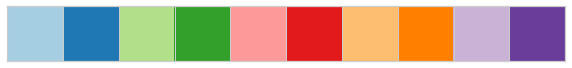

In [266]:
#Set the seaborn stlye
sns.set(style ='whitegrid',font_scale=1.5)
current_palette = sns.color_palette('Paired',10)
sns.palplot(current_palette)

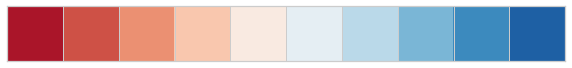

In [267]:
sns.set(style ='whitegrid',font_scale=1.5)
current_palette = sns.color_palette('RdBu',10)
sns.palplot(current_palette)



In [268]:
df = pd.read_csv('E:/DS/repo/SpringboardRepo/Capstone_Project_2/hotel_bookings.csv')

# 1. DATA CLEANING & WRANGLING

In [269]:
df.shape

(119390, 32)

In [270]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AAB30EB48>,
      dtype=object)

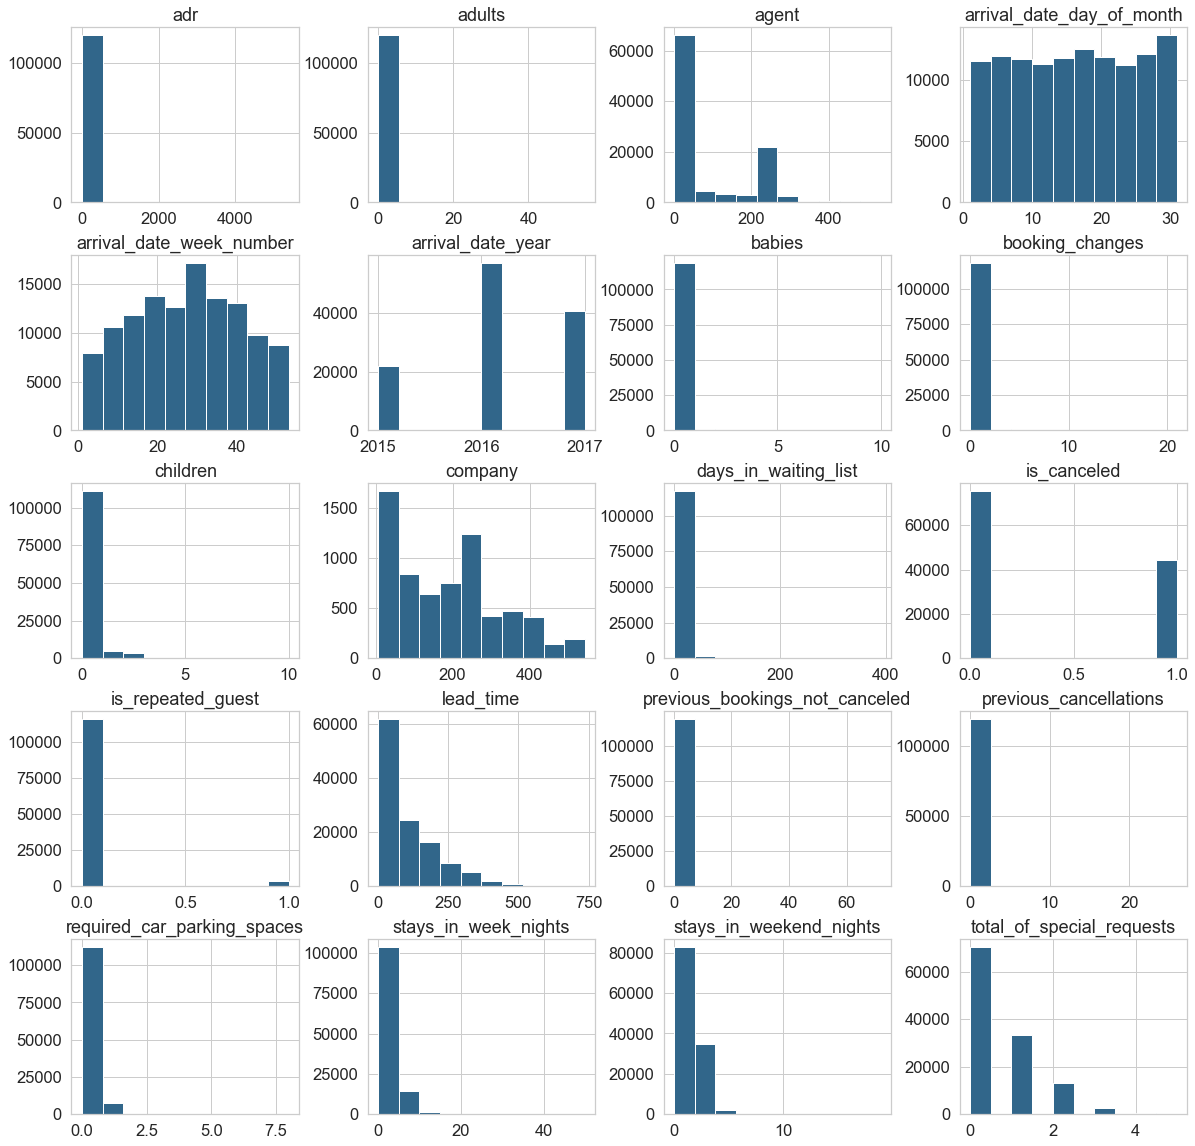

In [271]:
#check all the variables generally 
df.hist(figsize=(20,20),color=('#31668a'))

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [273]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## 1.1 drop the null and unnecessary columns

In [274]:
#'country' has a large proportion of missing data, so can be dropped with other unnecessary columns
drop_columns=['agent','company','arrival_date_week_number','arrival_date_day_of_month','reservation_status','reservation_status_date','assigned_room_type']
df1=df.drop(columns=drop_columns)

## 1.2 fill up the missing data

In [275]:
df1.children.max()

10.0

In [276]:
df1.children.value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [277]:
#replace missing data by mode
df1.children=df1.children.fillna(df1.children.mode()[0])

In [278]:
df1.country=df1.country.fillna(df1.country.mode()[0])

In [279]:
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

## 1.3 Dealing with some 'Undefined' Data

In [280]:
# "meal" contains values "Undefined", which is equal to SC
df1['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [281]:
df1.meal.replace('Undefined','SC',inplace=True)

In [282]:
# "market_segment" contains 2 values "Undefined", which takes little proportion of the dataset, so drop it
df1['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [283]:
drop_index=df1[df1['market_segment']=='Undefined']
drop_index

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
40600,City Hotel,1,2,2015,August,1,0,2,0.0,0,...,0,0,B,0,No Deposit,0,Transient-Party,12.0,0,1
40679,City Hotel,1,1,2015,August,0,2,3,0.0,0,...,0,0,B,0,No Deposit,0,Transient-Party,18.0,0,2


In [284]:
df1=df1.drop([40600,40679])

In [285]:
df1['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Name: market_segment, dtype: int64

## 1.4 Check the outliers

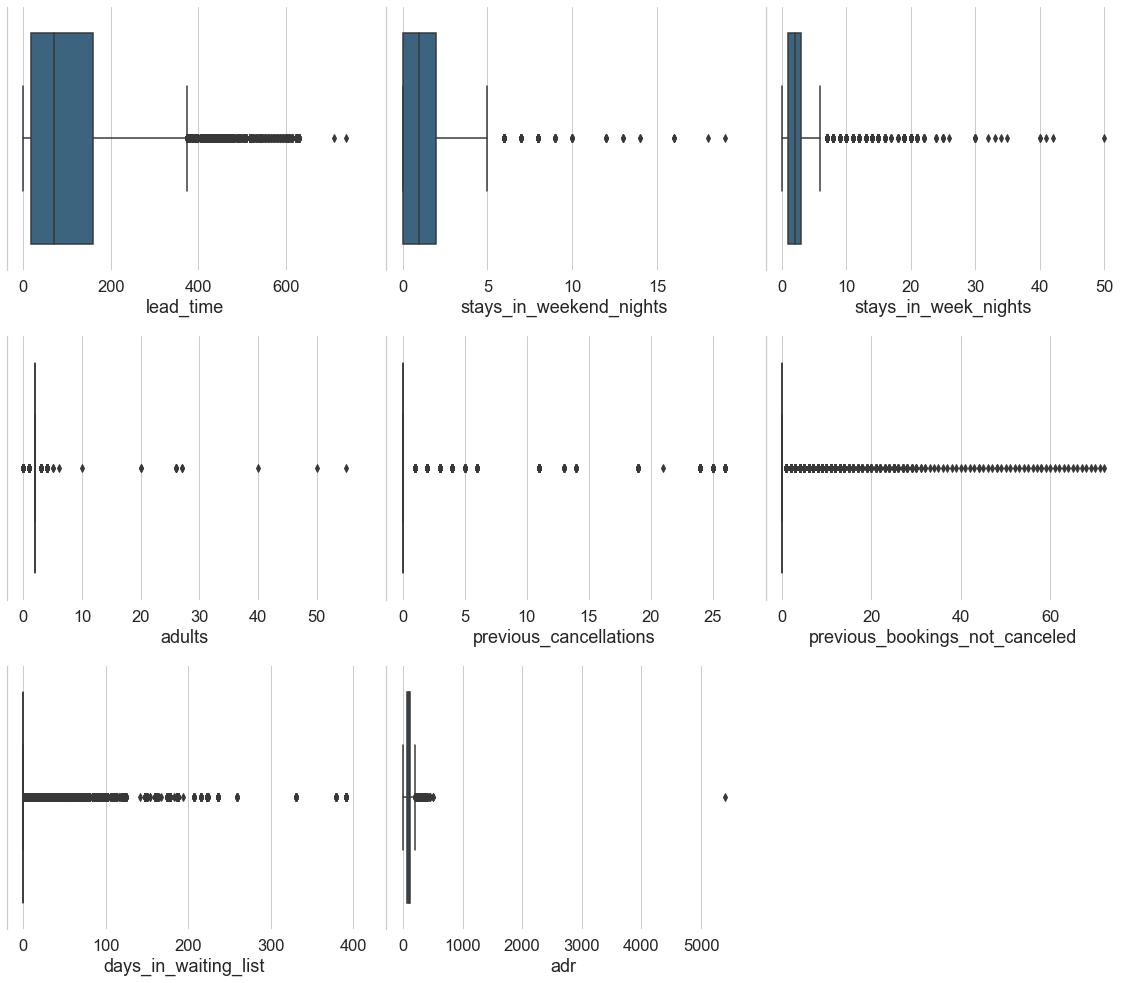

In [286]:
# Creating a boxplot for Outlier detection
features = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'previous_cancellations', 'previous_bookings_not_canceled',
            'days_in_waiting_list', 'adr']
n = 1
plt.figure(figsize=(16,14))
for feature in features:
    plt.subplot(3,3,n)
    sns.boxplot(df1[feature],color=('#31668a'))
    n+=1
    sns.despine(bottom=True)
    plt.tight_layout()

From the above boxplots,'adr' has an obvious outlier. So it should be dropped by IQR method. 

In [287]:
adr_stats=df1.adr.describe()
adr_stats

count    119388.000000
mean        101.832576
std          50.534962
min          -6.380000
25%          69.290000
50%          94.590000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [288]:
Q1 = df1['adr'].quantile(0.25)
Q3 = df['adr'].quantile(0.75)
IQR = Q3 - Q1
upper_bound=Q3+(IQR*1.5)
lower_bound=Q1-(IQR*1.5)
outlier_above=[n for n in df1['adr'].values if n>upper_bound]

In [289]:
clean_data=df1[~df1['adr'].isin(outlier_above)]
clean_data=clean_data.reset_index(drop=True)

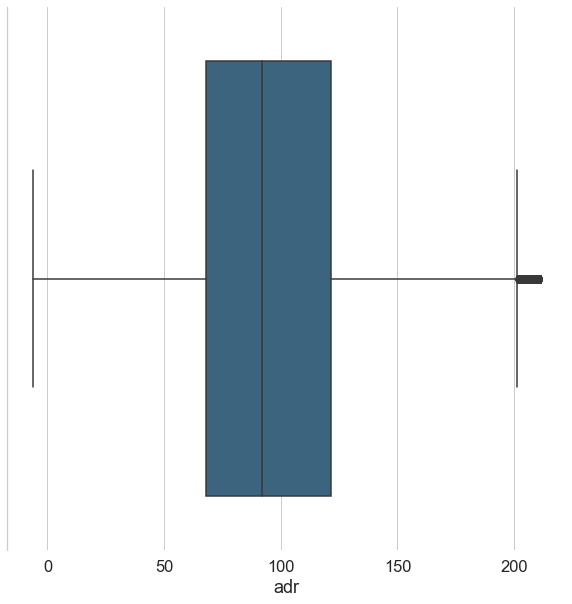

In [290]:
sns.boxplot(clean_data['adr'],color='#31668a')
sns.despine(bottom=True)

From the above boxplots,'country' count value has an obvious outlier. So it should be dropped by IQR method. 

In [291]:
clean_data.shape

(115595, 25)

# 3. EDA

In [292]:
clean_data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,0,0,C,3,No Deposit,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,0,0,C,4,No Deposit,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,...,0,0,A,0,No Deposit,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,0,1,1,0.0,0,...,0,0,A,0,No Deposit,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,0,2,2,0.0,0,...,0,0,A,0,No Deposit,0,Transient,98.0,0,1


## EDA PART I

**Firstly some general questions about booking.**

1.When is the peak season?

2.What is the price trend in a year?

3.Where are the visitors mainly from?

4.Which kind of hotel is more popular?

5.What kind of methods by which visitors usually make a booking?

6.What is the customer type of booking?

7.What kind of booking distribution channel do customers choose?

8.What is the lead time distribution?

9.How long do the visitors usually stay?

10.What is the proportion of stay week nights or weekend nights?

11.What is the relationship of bookings and total number of special requests?
12. Will the car parking requirement affect bookings?

13.Will the booking changes affect bookings?
14. some additional questions


In [293]:
#create some donut cart plot function
def donut_ploy(m,n):
    plt.figure(figsize=(10,10))

    plt.figure(figsize=(10,10))

    cmap =plt.get_cmap('Paired')
    colors = cmap(np.arange(3)*4)
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    plt.pie(m, labels=n, wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },colors=colors)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title('Percentage', weight='bold').set_fontsize('20')
    plt.show()


In [294]:
#define a function to generate the feature analysis
def ans(f):
    #group by features
    clean_data_feature=clean_data.groupby([f,'hotel'])[f].count().sort_values(ascending=False)
    #plot the data of the feature
    clean_data_feature.unstack().plot(kind='bar',figsize=(12,8),fontsize= 15,color=['navajowhite','steelblue'])
    plt.title((f).capitalize()+' VS Bookings(Classified by hotel)',weight='bold').set_fontsize('20')
    plt.xticks(rotation= 0)
    plt.xlabel((f).capitalize(),weight='bold',fontsize=17)
    plt.ylabel('No. of Bookings',weight='bold',fontsize=17)
    
    plt.grid(axis="x")
    sns.despine(left=True)
    plt.show()

### 1.When is the peak season?

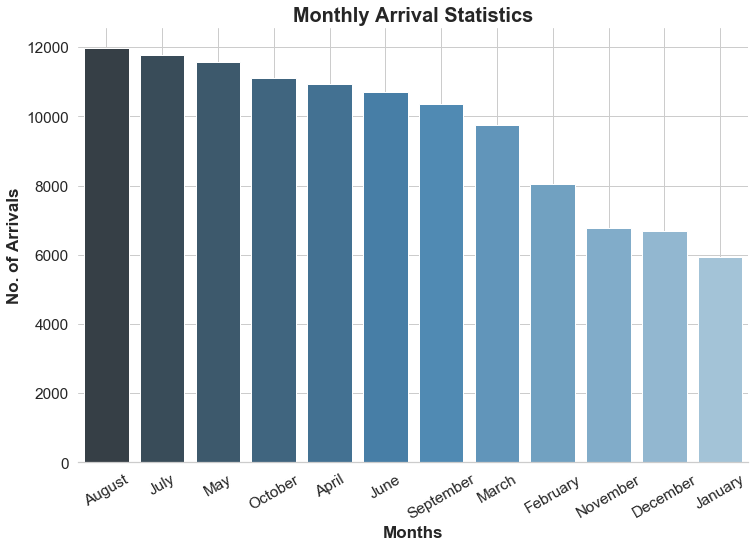

In [295]:
plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)
sns.countplot(x='arrival_date_month',data=clean_data,order = clean_data['arrival_date_month'].value_counts().index,palette=sns.color_palette('Blues_d',12))

plt.title('Monthly Arrival Statistics',weight='bold').set_fontsize('20')
plt.xlabel('Months',weight='bold',fontsize=17)
plt.ylabel('No. of Arrivals',weight='bold',fontsize=17)
plt.xticks(rotation= 30)

plt.grid(axis="x")
sns.despine(left=True)

plt.show()

In [296]:
clean_data_month=clean_data.groupby(['arrival_date_month','hotel']).arrival_date_month.count()

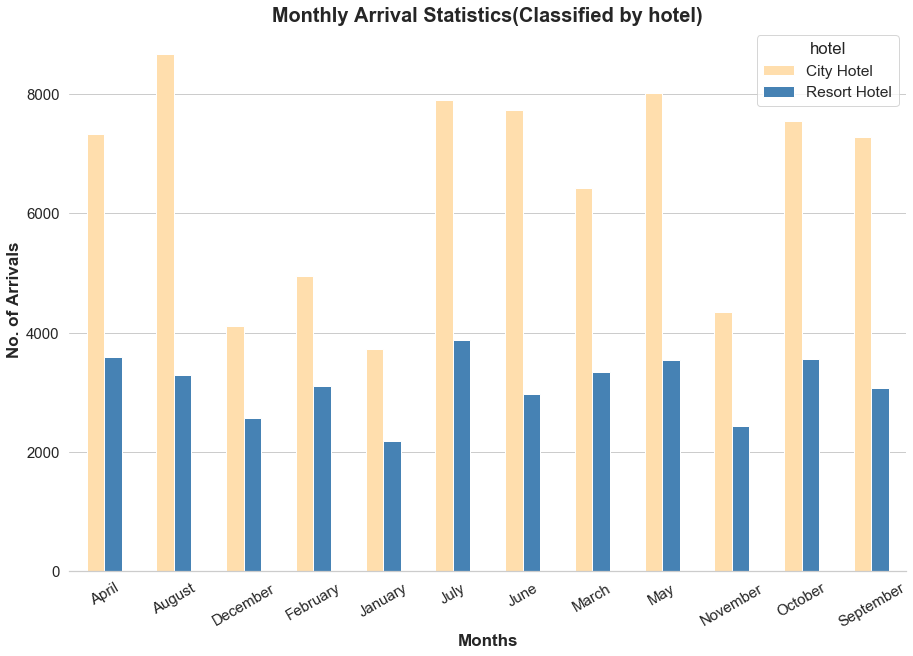

In [297]:
#Monthly Arriving Count by hotel species
sns.set(style ='whitegrid',font_scale=1.4)

clean_data_month.unstack().plot(kind='bar',figsize=(15,10),fontsize= 15,color=['navajowhite','steelblue'])

plt.title('Monthly Arrival Statistics(Classified by hotel)',weight='bold').set_fontsize('20')
plt.xlabel('Months',weight='bold',fontsize=17)
plt.ylabel('No. of Arrivals',weight='bold',fontsize=17)
plt.xticks(rotation= 30)

plt.grid(axis="x")
sns.despine(left=True)

plt.show()

In [298]:
#Yearly Arriving Count by hotel species
clean_data_year=clean_data.groupby(['arrival_date_year','hotel']).arrival_date_year.count()

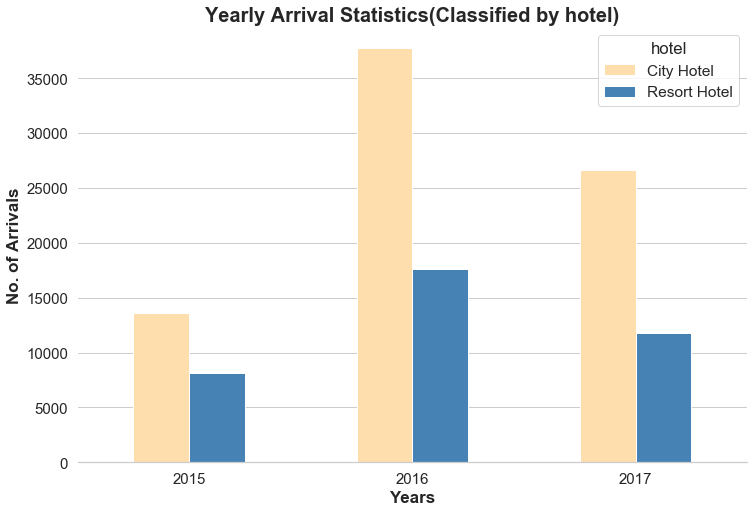

In [299]:
sns.set(style ='whitegrid',font_scale=1.4)
clean_data_year.unstack().plot(kind='bar',figsize=(12,8),fontsize= 15,color=['navajowhite','steelblue'])

plt.title('Yearly Arrival Statistics(Classified by hotel)',weight='bold').set_fontsize('20')
plt.xlabel('Years',weight='bold',fontsize=17)
plt.ylabel('No. of Arrivals',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

- Summer (August and July) are the most popular seasons for visitors.Booking number in winter(Dec,Jan,Nov) is the lowest. 

- 2016 is the most popular year.

### 2.What is the price trend in a year?

In [300]:
clean_data_resort=clean_data[clean_data.hotel=='Resort Hotel']
clean_data_city=clean_data[clean_data.hotel=='City Hotel']

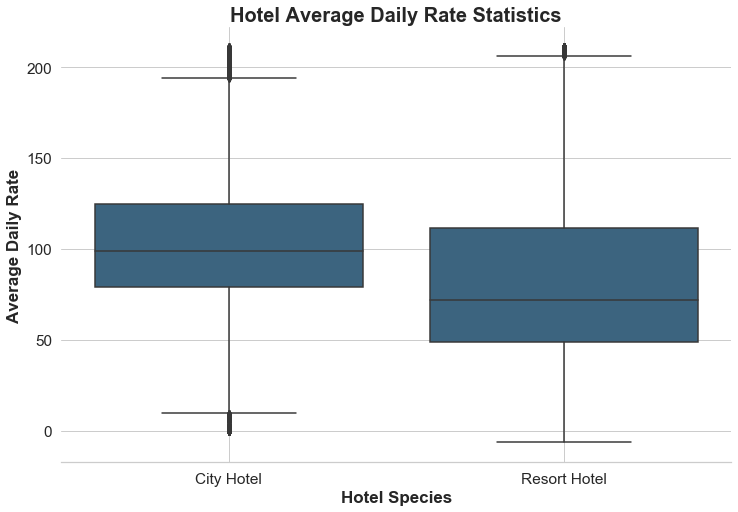

In [301]:
plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)

sns.boxplot(x='hotel',y='adr',data=clean_data,color='#31668a',order = clean_data['hotel'].value_counts().index)

plt.title('Hotel Average Daily Rate Statistics',weight='bold').set_fontsize('20')
plt.xlabel('Hotel Species',weight='bold',fontsize=17)
plt.ylabel('Average Daily Rate',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

In [302]:
clean_data_adr_all=clean_data.groupby('arrival_date_month').adr.mean().sort_values()

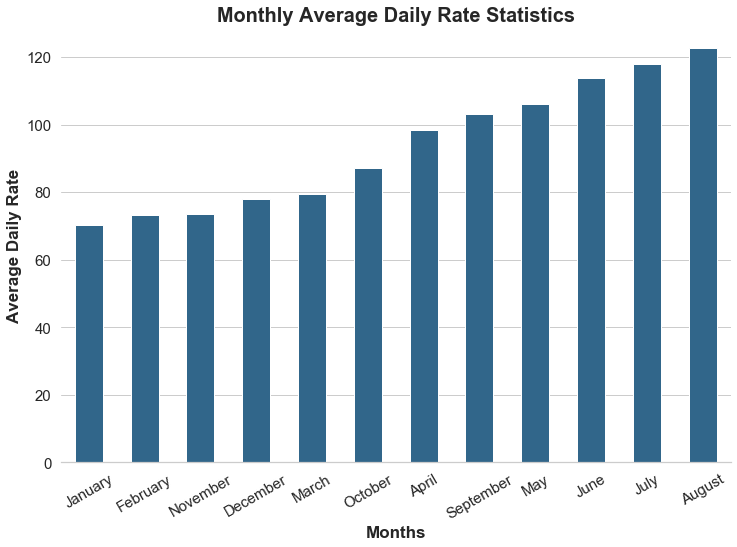

In [303]:
sns.set(style ='whitegrid',font_scale=1.4)

clean_data_adr_all.plot(kind='bar',figsize=(12,8),fontsize= 15,color='#31668a')

plt.title('Monthly Average Daily Rate Statistics',weight='bold').set_fontsize('20')
plt.xlabel('Months',weight='bold',fontsize=17)
plt.ylabel('Average Daily Rate',weight='bold',fontsize=17)
plt.xticks(rotation= 30)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

In [304]:
clean_data_adr_month=clean_data.groupby(['arrival_date_month','hotel']).adr.mean().sort_values()

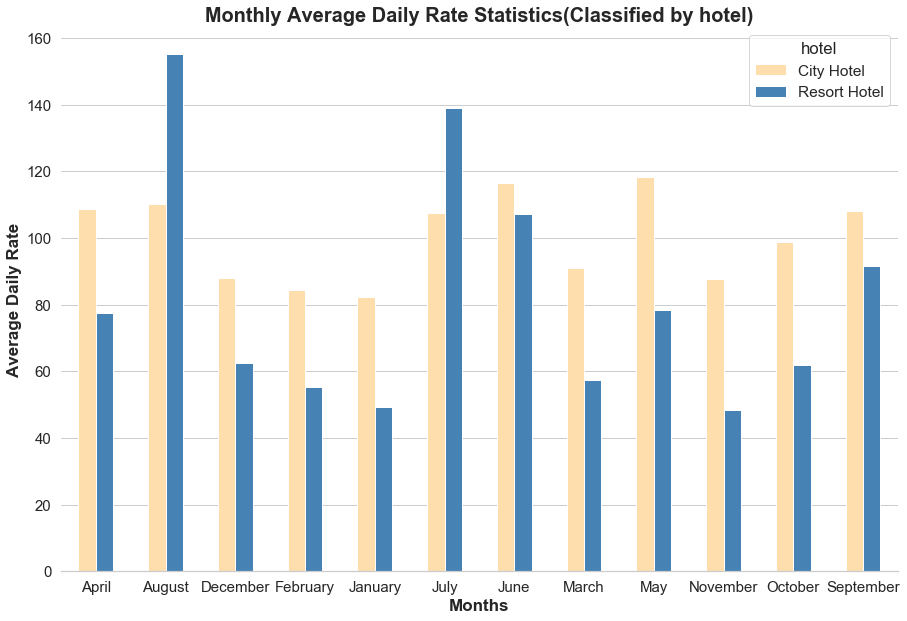

In [305]:
clean_data_adr_month.unstack().plot(kind='bar',figsize=(15,10),fontsize= 15,color=['navajowhite','steelblue'])

plt.title('Monthly Average Daily Rate Statistics(Classified by hotel)',weight='bold').set_fontsize('20')
plt.xlabel('Months',weight='bold',fontsize=17)
plt.ylabel('Average Daily Rate',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

In [306]:
#get the data of year and adr
clean_data_adr_year=clean_data.groupby(['arrival_date_year','hotel']).adr.mean()

In [307]:
clean_data_adr_year.head(10)

arrival_date_year  hotel       
2015               City Hotel       85.266057
                   Resort Hotel     85.597684
2016               City Hotel      101.952685
                   Resort Hotel     79.399821
2017               City Hotel      113.555514
                   Resort Hotel     91.820061
Name: adr, dtype: float64

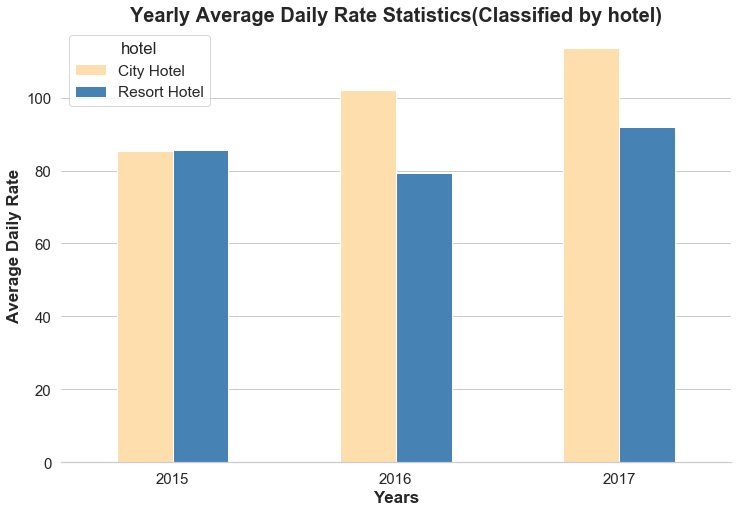

In [308]:
clean_data_adr_year.unstack().plot(kind='bar',figsize=(12,8),fontsize= 15,color=['navajowhite','steelblue'])

plt.title('Yearly Average Daily Rate Statistics(Classified by hotel)',weight='bold').set_fontsize('20')
plt.xlabel('Years',weight='bold',fontsize=17)
plt.ylabel('Average Daily Rate',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

- City hotels have a higher mean price than resort hotels.
- August has the highest adr.  Summer has higher adr than winter.
- In summer resort hotels usually have a higher adr than city hotels. Resort hotels are greatly influenced by the seasons.
- Adr is growing year by year.


### 3.Where are the visitors mainly from?

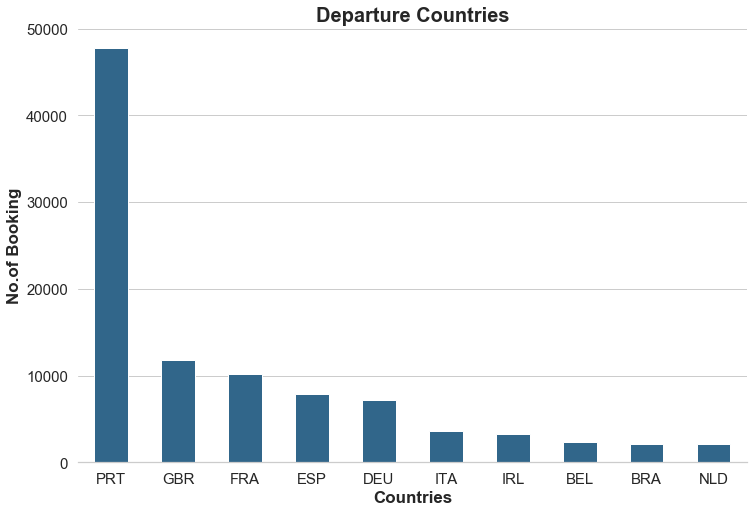

In [309]:
clean_data.country.value_counts().head(10).plot(kind='bar',figsize=(12,8),fontsize= 15,color='#31668a')

plt.title('Departure Countries',weight='bold').set_fontsize('20')
plt.xlabel('Countries',weight='bold',fontsize=17)
plt.ylabel('No.of Booking',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

The dataset is created in Portugal. Except for Portugal, UK is the largest visitor's original country.

### 4.Which kind of hotel is more popular?

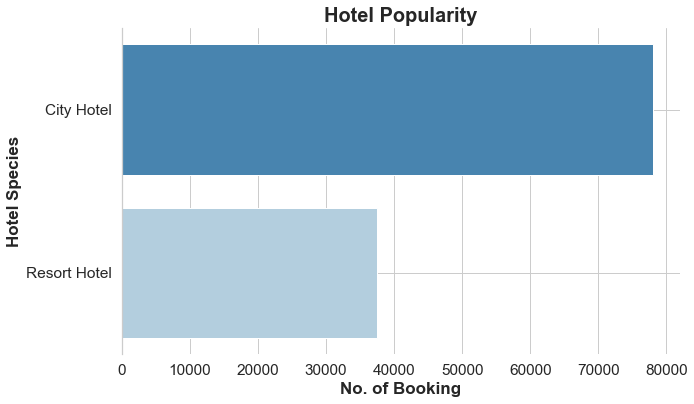

In [310]:
plt.figure(figsize=(10,6))
sns.set(style ='whitegrid',font_scale=1.4)

sns.countplot(y='hotel',data=clean_data,palette='Blues_r',order = clean_data['hotel'].value_counts().index)

plt.title('Hotel Popularity',weight='bold').set_fontsize('20')
plt.xlabel('No. of Booking',weight='bold',fontsize=17)
plt.ylabel('Hotel Species',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="y")
sns.despine(bottom=True)
plt.show()

### 5. What kind of methods by which visitors usually make a booking?
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

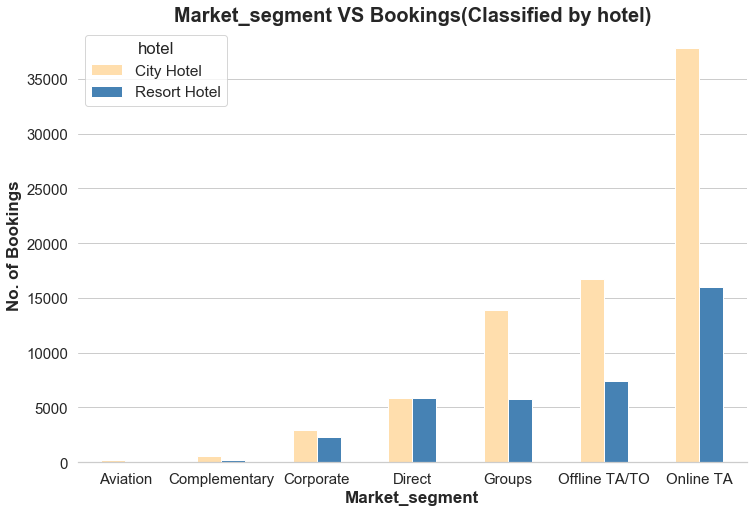

In [311]:
ans('market_segment')

- Most people prefer to choose the Online Travel Agents.

### 6.What is the  type of bookings?
Type of booking, assuming one of four categories:

Contract - when the booking has an allotment or other type of contract associated to it;

Group – when the booking is associated to a group;

Transient – when the booking is not part of a group or contract, and is not associated to other transient booking;

Transient-party – when the booking is transient, but is associated to at least other transient booking

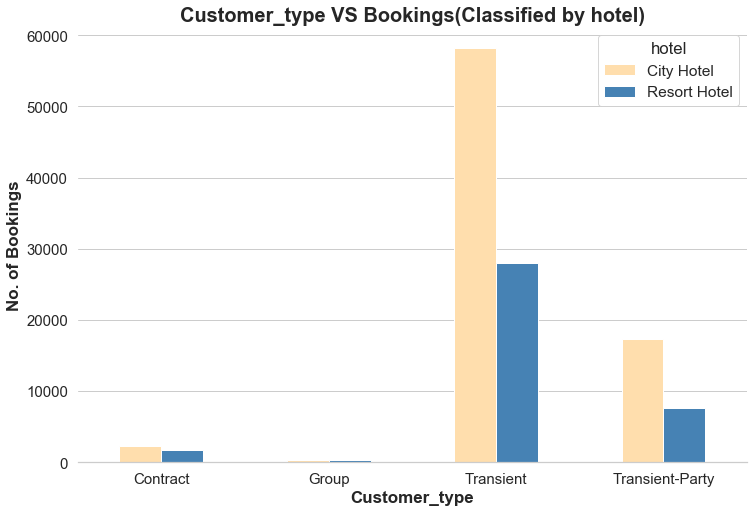

In [312]:
ans('customer_type')

- Most bookings are transient.

### 7.What kind of booking distribution channel do customers choose?
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

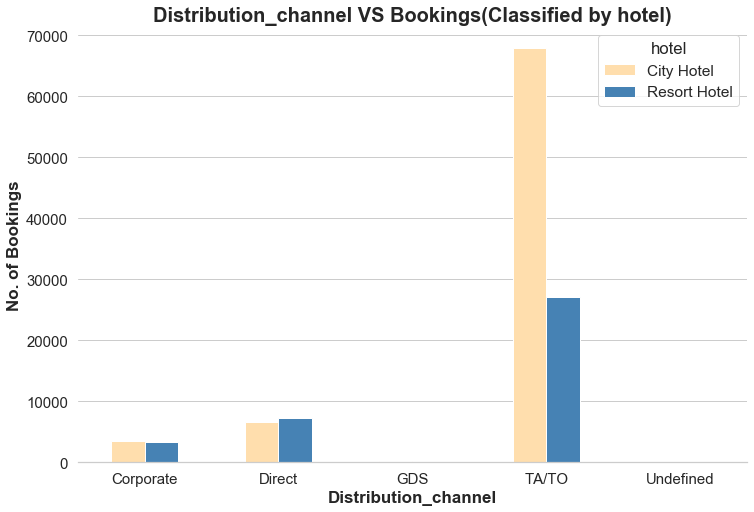

In [313]:
ans('distribution_channel')

- Most people prefer to choose the Travel Agents and Tour Operators.

### 8.What is the lead time distribution?
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

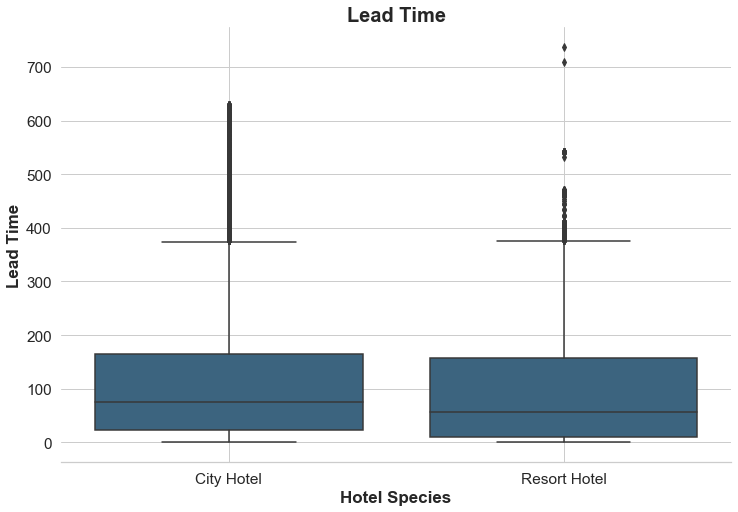

In [314]:
plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)

sns.boxplot(x='hotel',y='lead_time',data=clean_data,color='#31668a',order = clean_data['hotel'].value_counts().index)

plt.title('Lead Time',weight='bold').set_fontsize('20')
plt.xlabel('Hotel Species',weight='bold',fontsize=17)
plt.ylabel('Lead Time',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

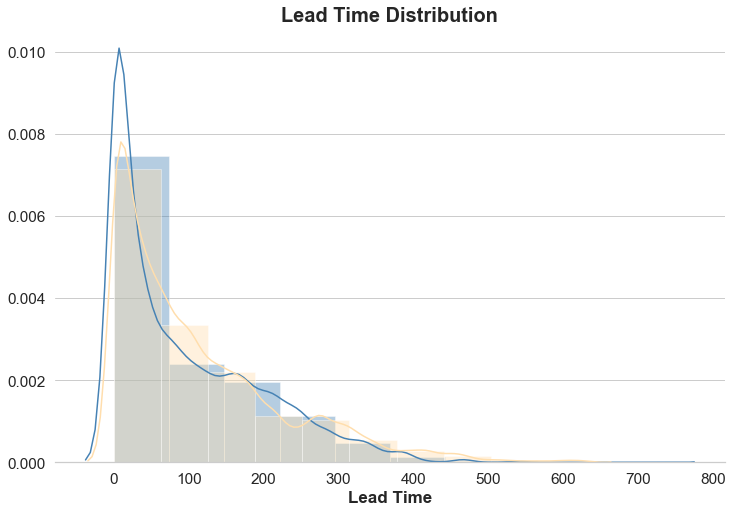

In [315]:
plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)

sns.distplot(clean_data_resort.lead_time,bins=10,color='steelblue')
sns.distplot(clean_data_city.lead_time,bins=10,color='navajowhite')

plt.title('Lead Time Distribution',weight='bold').set_fontsize('20')
plt.xlabel('Lead Time',weight='bold',fontsize=17)

plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

- Most booking lead time concentratedly distributes below 100 days. Resort hotels lead time is a little less than city hotels

### 9.How long do the visitors usually stay?

In [316]:
# add a new column named 'total_span_of_stay' to calculate the length of saty both in week and weekend
clean_data['total_span_of_stay']=clean_data.stays_in_week_nights + clean_data.stays_in_weekend_nights

In [317]:
length_of_stay = clean_data['total_span_of_stay'].value_counts().sort_index()

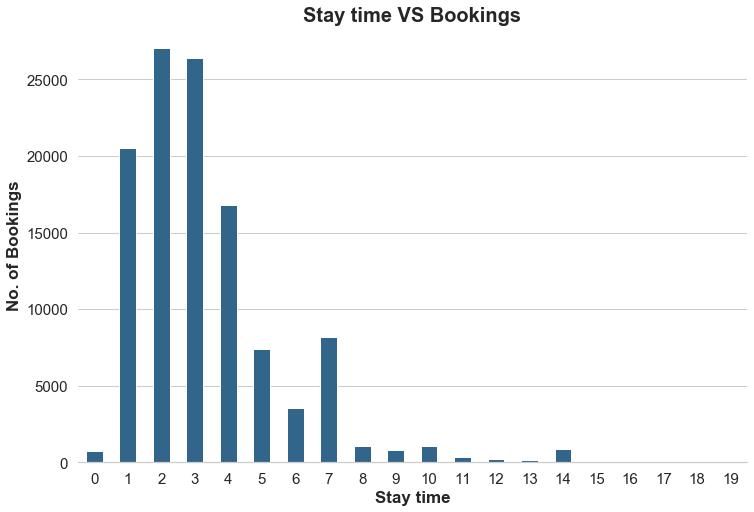

In [318]:
#coz a large span, choose the first 20 data
plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)

length_of_stay.head(20).plot(kind='bar',fontsize= 15,color='#31668a')
plt.title('Stay time VS Bookings',weight='bold').set_fontsize('20')
plt.xlabel('Stay time',weight='bold',fontsize=17)
plt.ylabel('No. of Bookings',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

In [319]:
clean_data_los=clean_data.groupby(['total_span_of_stay','hotel']).total_span_of_stay.count().head(40).sort_values(ascending=False)

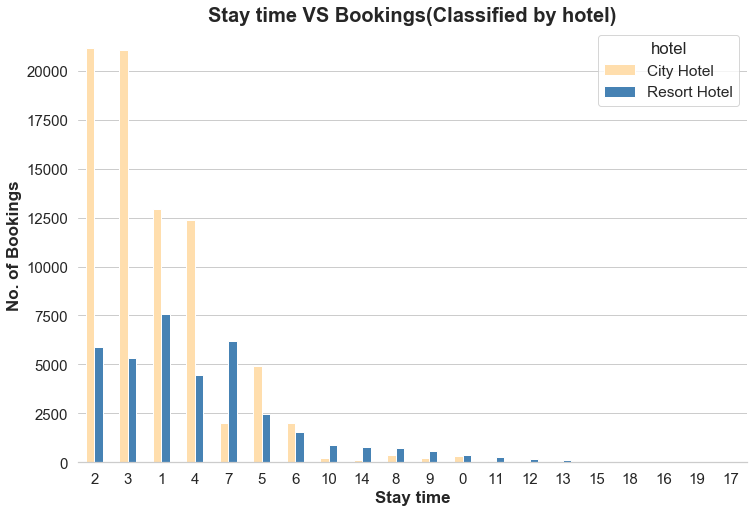

In [320]:
clean_data_los.unstack().plot(kind='bar',figsize=(12,8),fontsize= 15,color=['navajowhite','steelblue'])

plt.title('Stay time VS Bookings(Classified by hotel)',weight='bold').set_fontsize('20')
plt.xlabel('Stay time',weight='bold',fontsize=17)
plt.ylabel('No. of Bookings',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

In [321]:
#monthly Stay time 
clean_data_los_monthly=clean_data.groupby(['arrival_date_month','hotel']).total_span_of_stay.mean().head(40).sort_values(ascending=False)

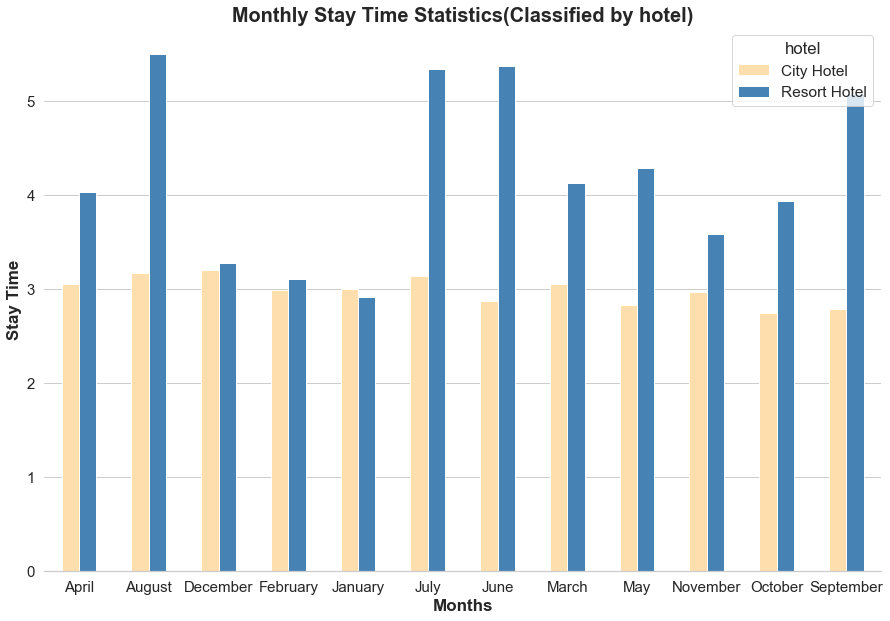

In [322]:
clean_data_los_monthly.unstack().plot(kind='bar',figsize=(15,10),fontsize= 15,color=['navajowhite','steelblue'])

plt.title('Monthly Stay Time Statistics(Classified by hotel)',weight='bold').set_fontsize('20')
plt.xlabel('Months',weight='bold',fontsize=17)
plt.ylabel('Stay Time',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

- Most bookings have a 1-3 days stay time.
- Resort hotels stay time is a little longer than city hotels.
- Resort hotels usually have a longer stay time in summer.

### 10.What is the proportion of stay week nights or weekend nights?

In [323]:
clean_data.stays_in_weekend_nights[2]

0

In [324]:
#create a new feature named 'stay_time' to calculate the no of week/weekend
clean_data['week/weekend']=None

for idx, val in enumerate(clean_data.stays_in_week_nights):
    if val>0 and clean_data.stays_in_weekend_nights[idx]==0:
        clean_data['week/weekend'][idx]='weekday'
    elif val==0 and clean_data.stays_in_weekend_nights[idx]>0:
        clean_data['week/weekend'][idx]='weekend'
    else:
        clean_data['week/weekend'][idx]='weekday/weekend' 
        

C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [325]:
clean_data.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_span_of_stay,week/weekend
0,Resort Hotel,0,342,2015,July,0,0,2,0.0,0,...,C,3,No Deposit,0,Transient,0.0,0,0,0,weekday/weekend
1,Resort Hotel,0,737,2015,July,0,0,2,0.0,0,...,C,4,No Deposit,0,Transient,0.0,0,0,0,weekday/weekend
2,Resort Hotel,0,7,2015,July,0,1,1,0.0,0,...,A,0,No Deposit,0,Transient,75.0,0,0,1,weekday


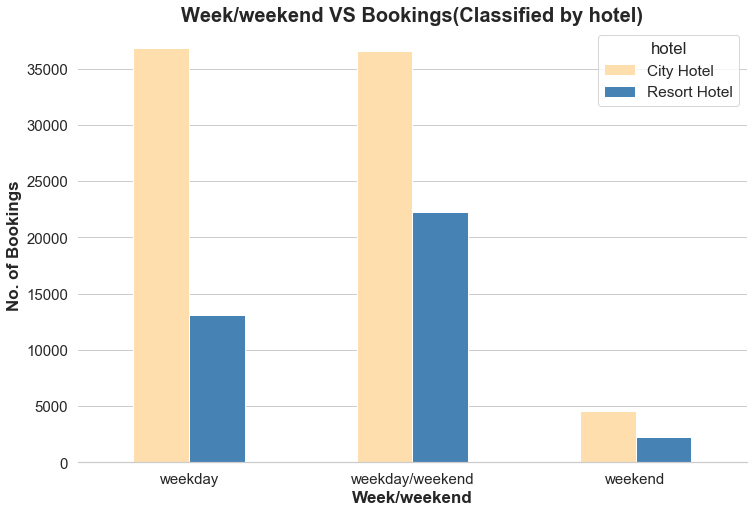

In [326]:
ans('week/weekend')

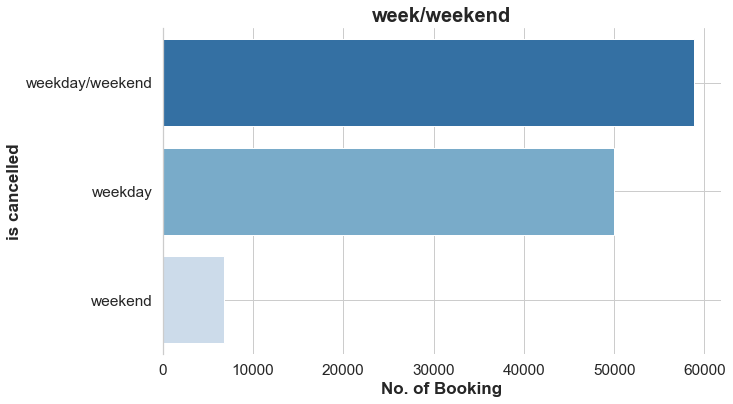

In [327]:
plt.figure(figsize=(10,6))
sns.set(style ='whitegrid',font_scale=1.4)
sns.countplot(y='week/weekend',data=clean_data,palette='Blues_r')

plt.title('week/weekend',weight='bold').set_fontsize('20')
plt.xlabel('No. of Booking',weight='bold',fontsize=17)
plt.ylabel('is cancelled',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="y")
sns.despine(bottom=True)
plt.show()

In [328]:
#get the data of stay time in week and weekend
clean_data_los_week=clean_data.groupby('stays_in_week_nights').arrival_date_month.count()
clean_data_los_weekend=clean_data.groupby('stays_in_weekend_nights').arrival_date_month.count()

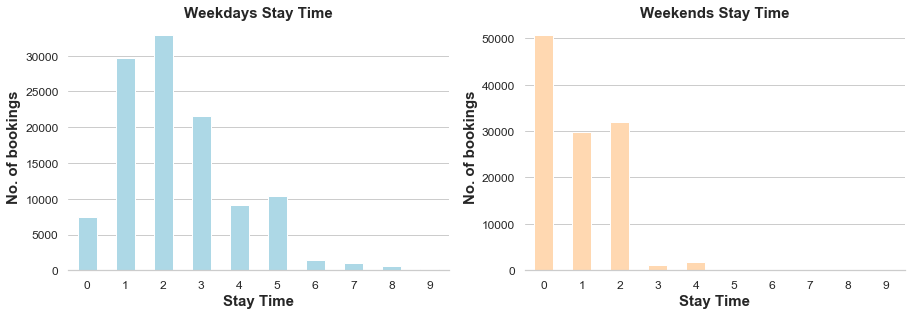

In [329]:
plt.figure(figsize=(15,10))
sns.set(style ='whitegrid',font_scale=1.4)

plt.subplot(2,2,1);
clean_data_los_week.head(10).plot(kind='bar',color='lightblue',fontsize= 12)
plt.title('Weekdays Stay Time',weight='bold',fontsize=15)
plt.xlabel('Stay Time',weight='bold',fontsize=15)
plt.ylabel('No. of bookings',weight='bold',fontsize=15)
plt.xticks(rotation= 0)
plt.grid(axis="x")
sns.despine(left=True)

plt.subplot(2,2,2);
clean_data_los_weekend.head(10).plot(kind='bar',color='#ffd8b1',fontsize= 12)
plt.title('Weekends Stay Time',weight='bold',fontsize=15)
plt.xlabel('Stay Time',weight='bold',fontsize=15)
plt.ylabel('No. of bookings',weight='bold',fontsize=15)
plt.xticks(rotation= 0)
plt.grid(axis="x")
sns.despine(left=True)

plt.show()

- Booking in weekdays is far more than weekends days. 
- Stay time in weekdays is longer than weekends.

### 11. What is the relationship of bookings and total number of special requests?

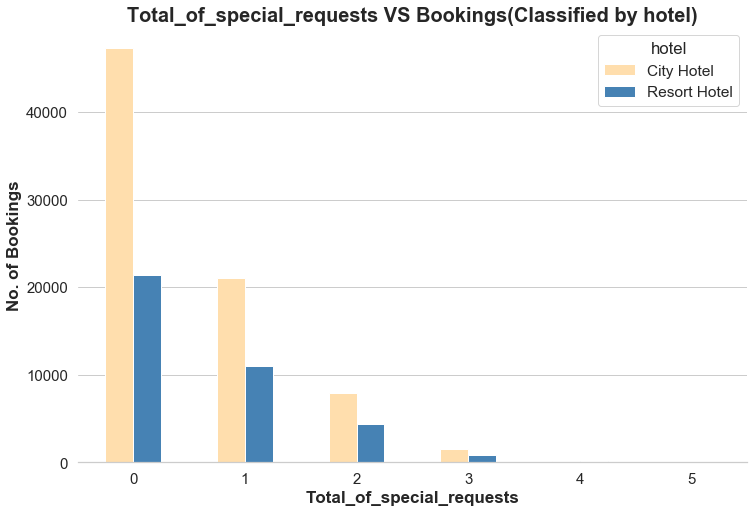

In [330]:
ans('total_of_special_requests')

### 12. Will the car parking requirement affect bookings?

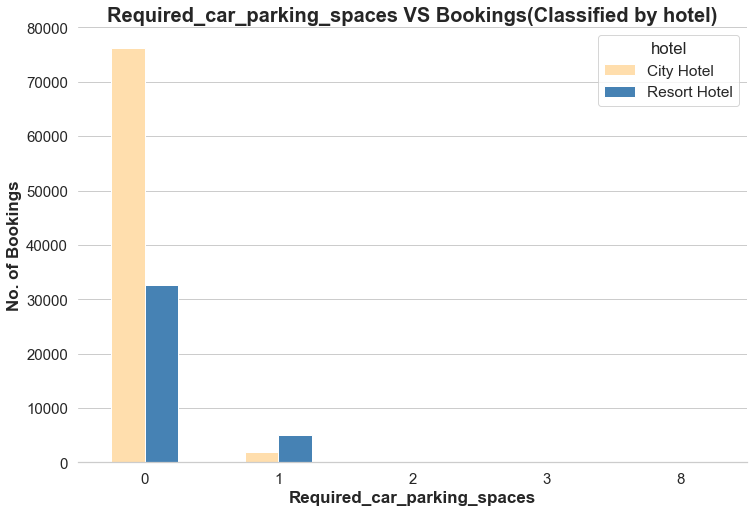

In [331]:
ans('required_car_parking_spaces')

### 13.Will the booking changes affect bookings?

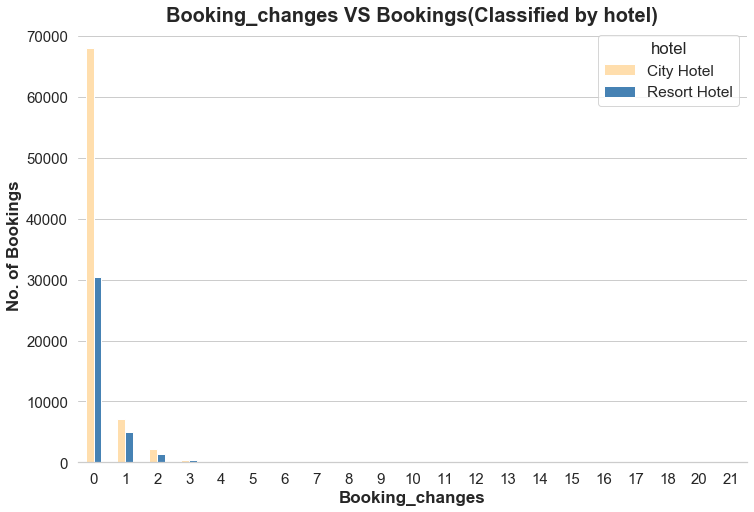

In [332]:
ans('booking_changes')

### 14. Some other questions
### Deposit

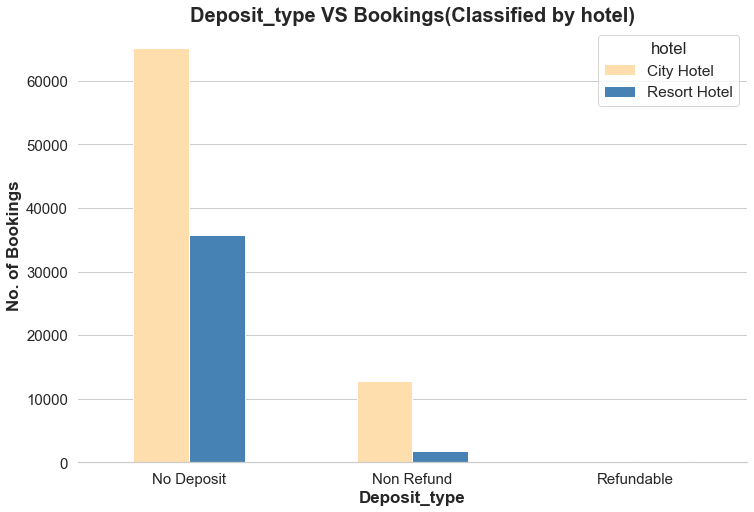

In [333]:
ans('deposit_type')


### Kids & Adults

In [334]:
#create a new feature to calculate the total number of children and babies
clean_data['number_of_kids']=clean_data.children + clean_data.babies

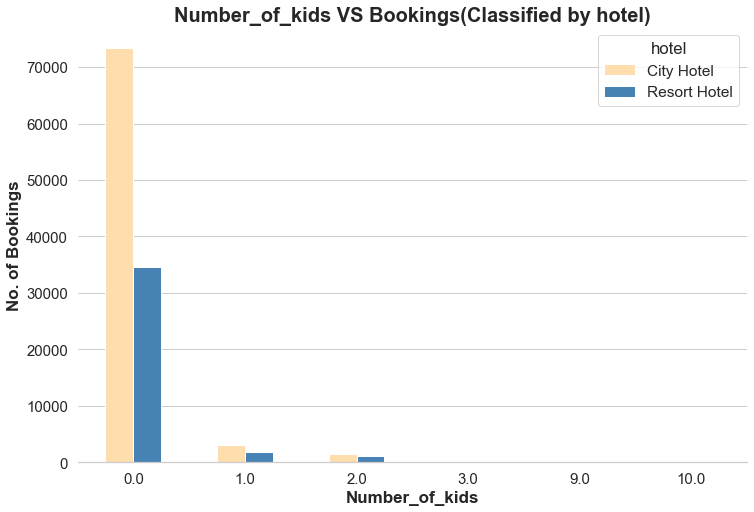

In [335]:
ans('number_of_kids')

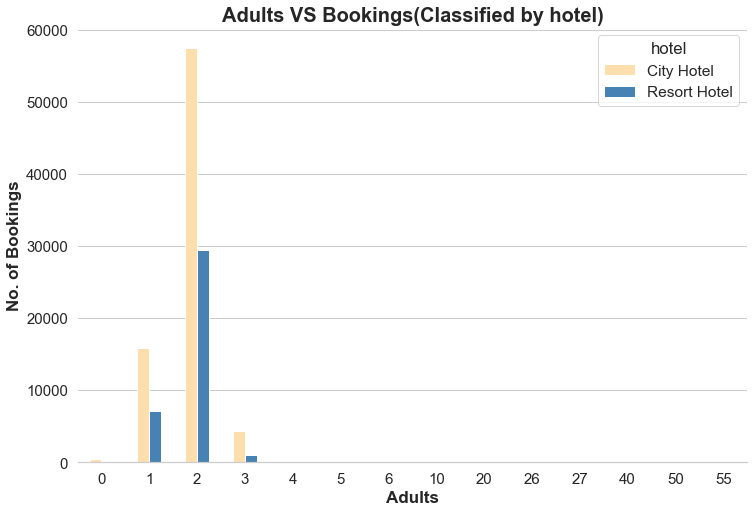

In [336]:
ans('adults')

In [337]:
### Meal

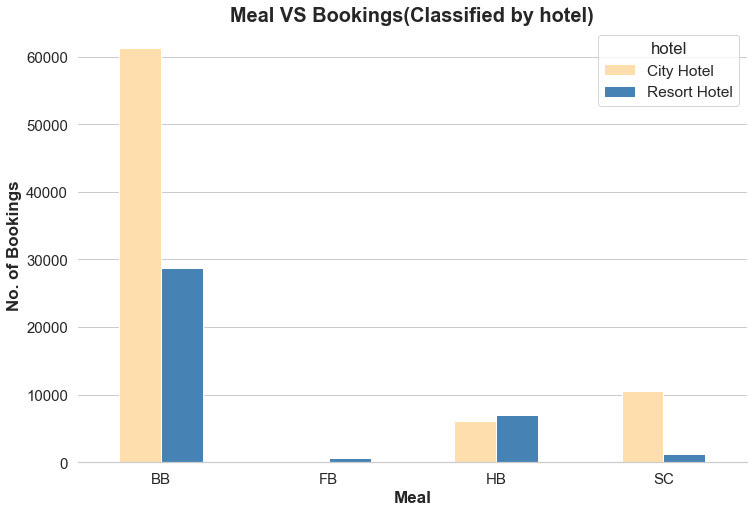

In [338]:
ans('meal')

## EDA PART II
**The following factors are related to the target variable(cancellation) closely.**

12.When is the peak season for cancellation?

15.What kind of visitors usually cancel the bookings?

16.The relationship of cancellation rate and lead time

17.The relationship of cancellation rate and planing stay time

18.When are people more likely to cancel the booking? Weekends or week days?


**For this part I plan to add a new feature named 'cancellation_rate', which can be used to assess the likelyhood of cancellation.**

In [339]:
clean_data_can=clean_data[clean_data.is_canceled==1]
clean_data_uncan=clean_data[clean_data.is_canceled==0]
clean_data_can=clean_data_can.reset_index(drop=True)
clean_data_uncan=clean_data_uncan.reset_index(drop=True)

In [340]:
#create a functionfor commute cancellation rate
def cancellation_rate(n):
    #get the data
    can_data=clean_data_can.groupby(n).is_canceled.count()
    uncan_data=clean_data_uncan.groupby(n).is_canceled.count()
    can_uncan=pd.concat([can_data,uncan_data], axis=1)
    can_uncan.columns=['cancelled_number','uncancelled_number']
    can_uncan['cancelled_rate(%)']=(can_uncan.cancelled_number/(can_uncan.cancelled_number+can_uncan.uncancelled_number))*100
    can_uncan['cancelled_rate(%)']=round(can_uncan['cancelled_rate(%)'],2)
    can_uncan=can_uncan.reset_index().sort_values(by=['cancelled_rate(%)'],ascending=False) 
    print(pd.DataFrame(can_uncan))
    
    
    #print the data
    can_uncan.plot(kind='bar',x=n,y='cancelled_rate(%)',figsize=(15,8),fontsize= 15,color='#31668a')
    plt.title((n).capitalize()+' VS Cancellations Rate',weight='bold').set_fontsize('20')
    
    plt.xticks(rotation=0)
    plt.legend().set_visible(False)
    plt.xlabel((n).capitalize(),weight='bold',fontsize=17)
    plt.ylabel('Cancelled Rate(%)',weight='bold',fontsize=17)
    
    plt.grid(axis="x")
    sns.despine(left=True)
    plt.show()

### 12.When is the peak season for  cancellation?

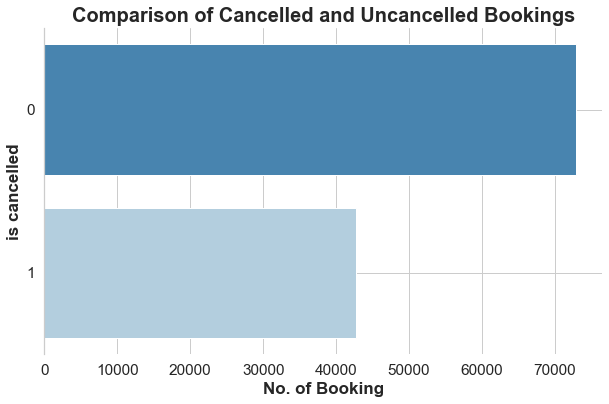

In [341]:
plt.figure(figsize=(10,6))
sns.set(style ='whitegrid',font_scale=1.4)

sns.countplot(y='is_canceled',data=clean_data,palette='Blues_r')

plt.title('Comparison of Cancelled and Uncancelled Bookings',weight='bold').set_fontsize('20')
plt.xlabel('No. of Booking',weight='bold',fontsize=17)
plt.ylabel('is cancelled',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="y")
sns.despine(bottom=True)
plt.show()

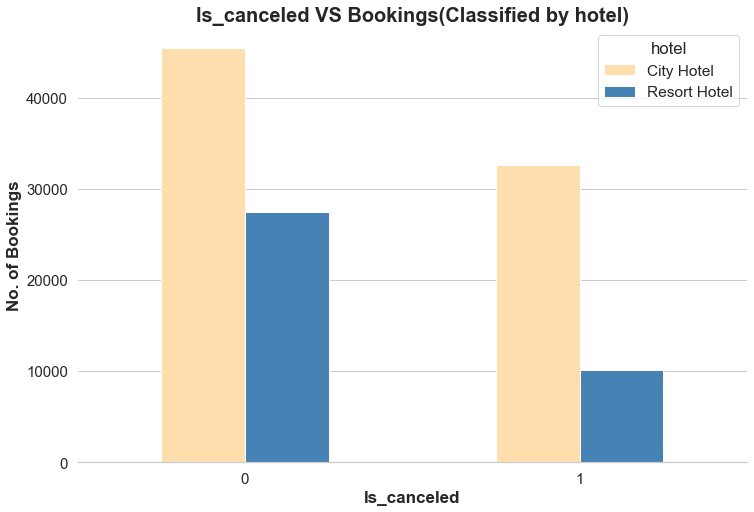

In [342]:
ans('is_canceled')

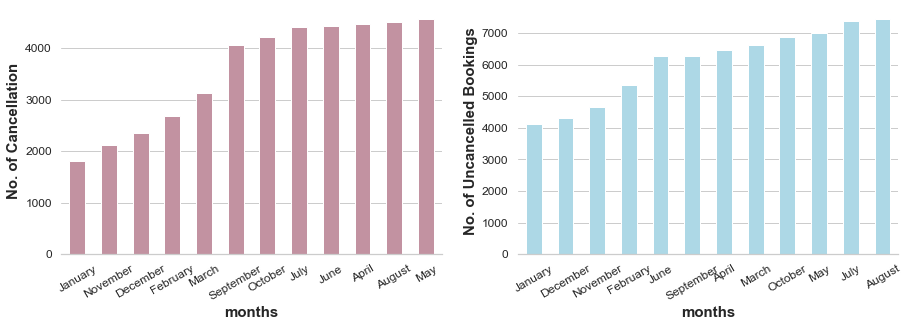

In [343]:
plt.figure(figsize=(15,10))
sns.set(style ='whitegrid',font_scale=1.4)

plt.subplot(2,2,1)
clean_data_can.arrival_date_month.value_counts().sort_values().plot(kind='bar',fontsize= 12,color='#c292a1')
plt.xlabel('months',weight='bold',fontsize=15)
plt.ylabel('No. of Cancellation',weight='bold',fontsize=15)
plt.xticks(rotation=30)
plt.grid(axis="x")
sns.despine(left=True)

plt.subplot(2,2,2)
clean_data_uncan.arrival_date_month.value_counts().sort_values().plot(kind='bar',fontsize= 12,color='lightblue')
plt.xlabel('months',weight='bold',fontsize=15)
plt.ylabel('No. of Uncancelled Bookings',weight='bold',fontsize=15)
plt.xticks(rotation=30)
plt.grid(axis="x")
sns.despine(left=True)

plt.show()

In [344]:
#create a function to analysis a feature vs booking number
def ans_can(f):
    #group by the data about the feature
    clean_data_feature=clean_data.groupby([f,'is_canceled'])['is_canceled'].count().sort_values(ascending=False)
    #plot the data of the feature
    clean_data_feature.unstack().plot(kind='bar',figsize=(12,8),fontsize= 15,color=['lightblue','#c292a1'])
    plt.title((f).capitalize()+' VS Bookings(Classified by Cancellation)',weight='bold').set_fontsize('20')
    
    plt.xticks(rotation=0)
    plt.legend(["uncancelled", "cancelled"])
    plt.xlabel((f).capitalize(),weight='bold',fontsize=17)
    plt.ylabel('No. of Bookings',weight='bold',fontsize=17)
    
    plt.grid(axis="x")
    sns.despine(left=True)
    plt.show()

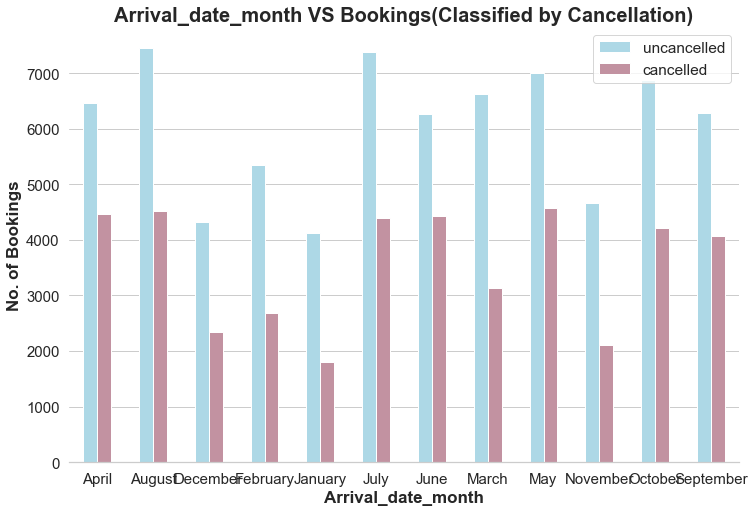

In [345]:
ans_can('arrival_date_month')

   arrival_date_month  cancelled_number  uncancelled_number  cancelled_rate(%)
6                June              4426                6270              41.38
0               April              4464                6473              40.82
8                 May              4568                7003              39.48
11          September              4064                6292              39.24
10            October              4217                6883              37.99
1              August              4515                7454              37.72
5                July              4400                7380              37.35
2            December              2352                4324              35.23
3            February              2691                5357              33.44
7               March              3133                6623              32.11
9            November              2116                4665              31.20
4             January              1807             

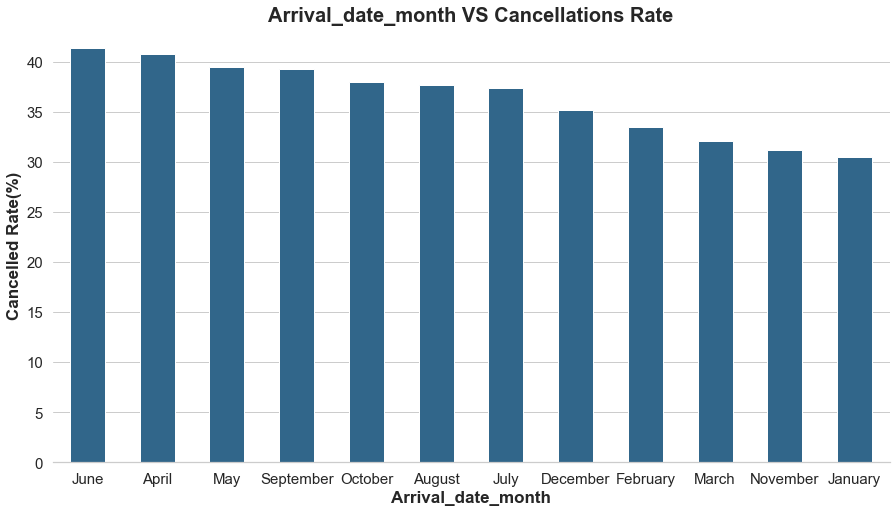

In [346]:
cancellation_rate('arrival_date_month')

- Booking cancellation number is far less than uncancelled ones.
- cancellations number is higher in April,May, June and July, which could be considered as the time before holiday.
- Bookings in April, May, June are more likeyly to be canceled. 

### 13.Which kind of hotel are more likely to be canceled？

          hotel  cancelled_number  uncancelled_number  cancelled_rate(%)
0    City Hotel             32608               45430              41.78
1  Resort Hotel             10145               27412              27.01


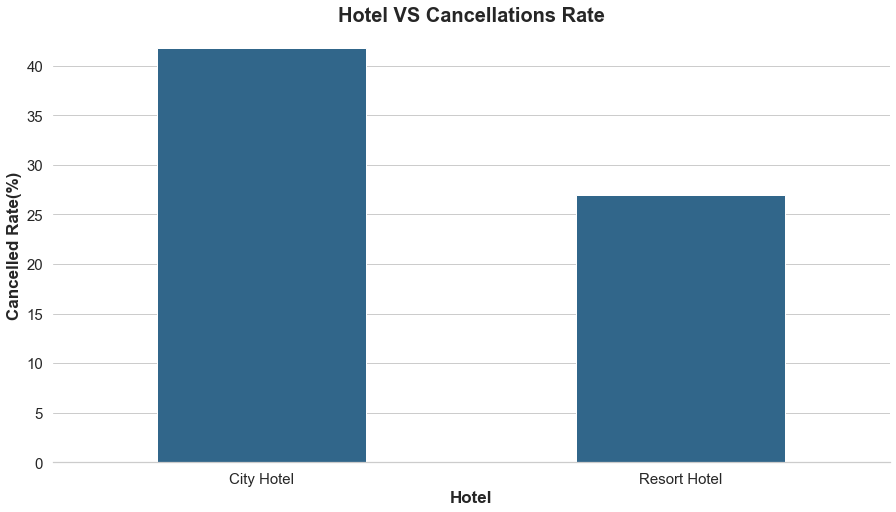

In [347]:
cancellation_rate('hotel')

- city hotels have larger cancellation rate than resort hotels.

### 14.What kind of booking methods are more  likely to be cancelled?

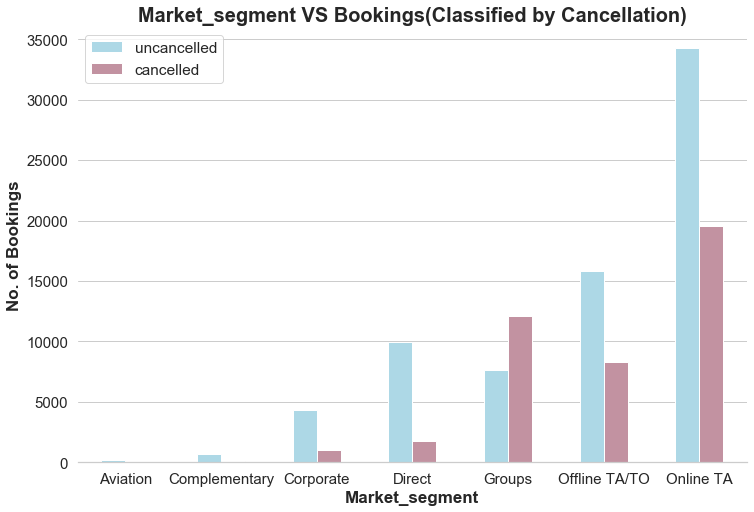

In [348]:
ans_can('market_segment')

  market_segment  cancelled_number  uncancelled_number  cancelled_rate(%)
4         Groups             12059                7653              61.18
6      Online TA             19510               34276              36.27
5  Offline TA/TO              8291               15820              34.39
0       Aviation                52                 185              21.94
2      Corporate               990                4299              18.72
3         Direct              1754                9963              14.97
1  Complementary                97                 646              13.06


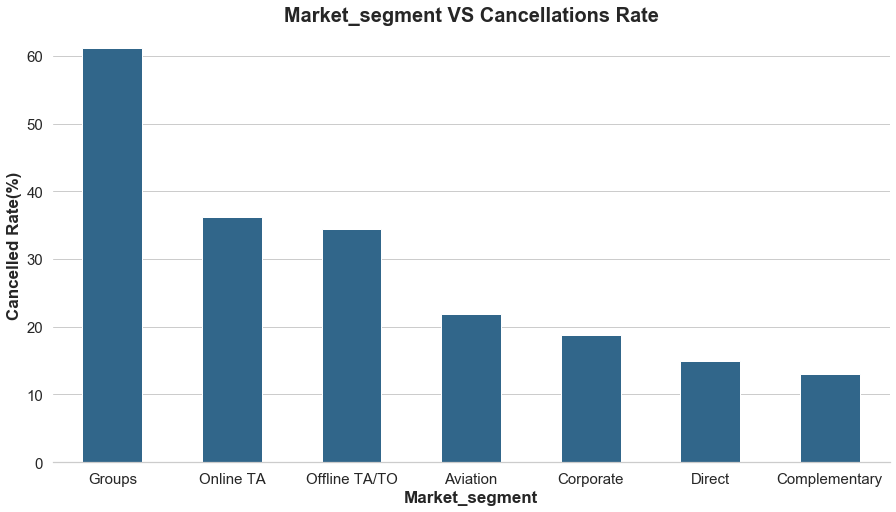

In [349]:
cancellation_rate('market_segment')

- Group bookings are more likely to suffer cancellation.
- But Online TA has the largest cancellation number.

### 15.What type of customers are more likely to cancel the bookings?

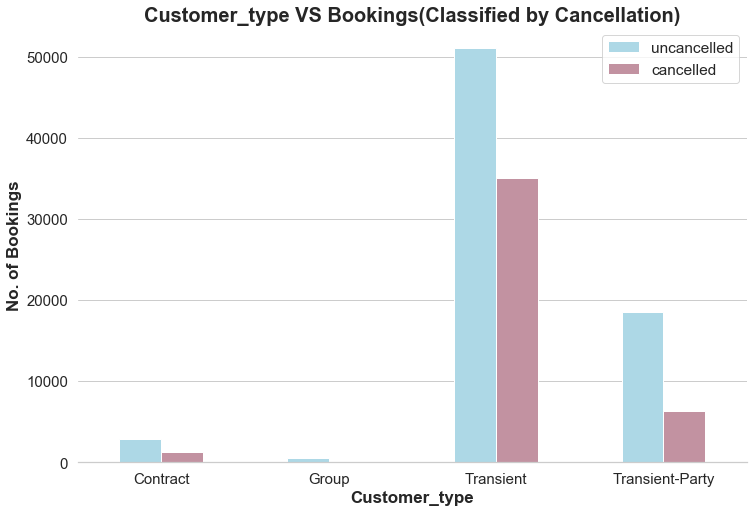

In [350]:
ans_can('customer_type')

     customer_type  cancelled_number  uncancelled_number  cancelled_rate(%)
2        Transient             35084               51048              40.73
0         Contract              1257                2805              30.95
3  Transient-Party              6358               18479              25.60
1            Group                54                 510               9.57


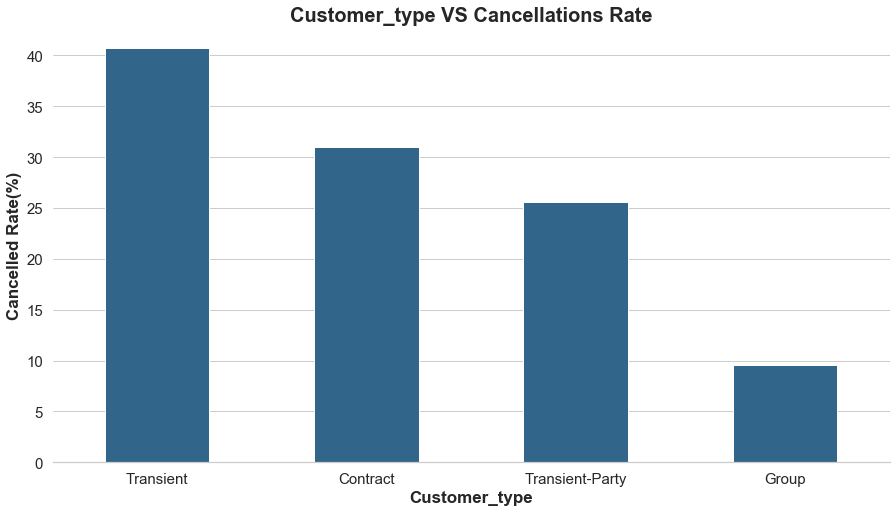

In [351]:
cancellation_rate('customer_type')

<Figure size 720x720 with 0 Axes>

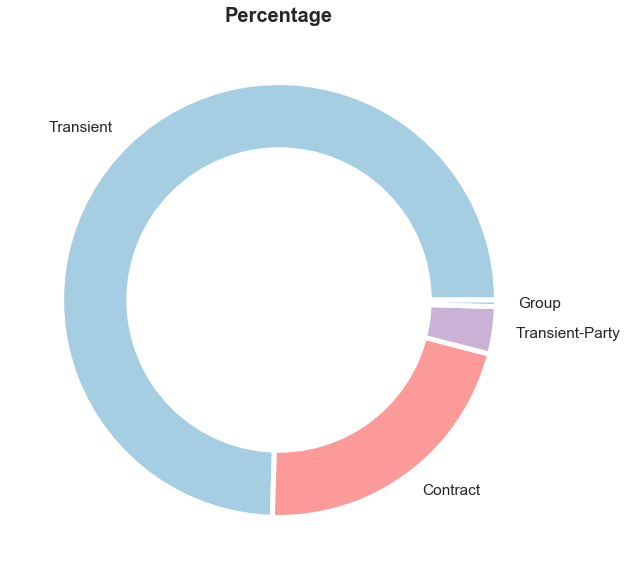

In [352]:
ct_labels=['Transient','Contract', 'Transient-Party','Group']
size = clean_data['customer_type'].value_counts()

donut_ploy(size,ct_labels)

- Transient customers who has the largest cancellation number are more likely to cancel the booking.

### 16.The relationship of cancellation and lead time

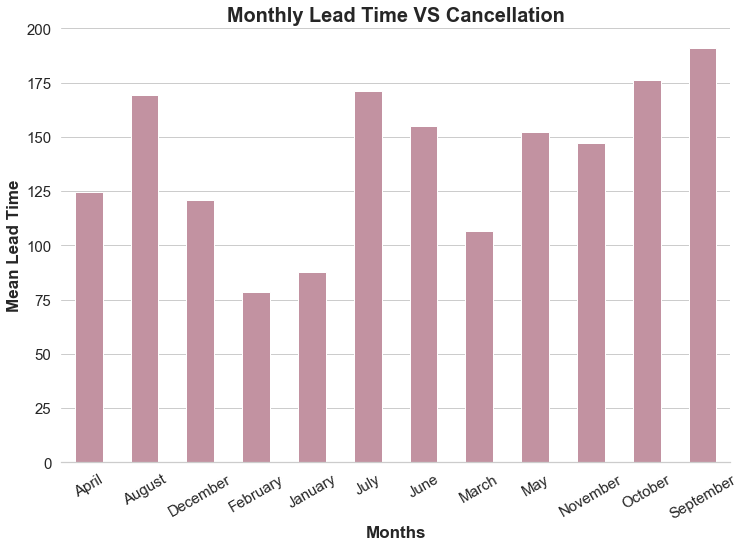

In [353]:
clean_data_leadtime_can=clean_data_can.groupby(['arrival_date_month','is_canceled']).lead_time.mean()

clean_data_leadtime_can.unstack().plot(kind='bar',figsize=(12,8),fontsize= 15,color=['#c292a1'])

plt.title('Monthly Lead Time VS Cancellation',weight='bold').set_fontsize('20')
plt.xlabel('Months',weight='bold',fontsize=17)
plt.ylabel('Mean Lead Time',weight='bold',fontsize=17)
plt.legend().set_visible(False)
plt.xticks(rotation= 30)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()


In [354]:
can_data_lead_time=clean_data_can.groupby('lead_time').is_canceled.count()
uncan_data_lead_time=clean_data_uncan.groupby('lead_time').is_canceled.count()
can_uncan_lead_time=pd.concat([can_data_lead_time,uncan_data_lead_time], axis=1)
can_uncan_lead_time.columns=['cancelled_number','uncancelled_number']
can_uncan_lead_time['cancelled_rate(%)']=(can_uncan_lead_time.cancelled_number/(can_uncan_lead_time.cancelled_number+can_uncan_lead_time.uncancelled_number))*100
can_uncan_lead_time['cancelled_rate(%)']=round(can_uncan_lead_time['cancelled_rate(%)'],2)
can_uncan_lead_time=can_uncan_lead_time.reset_index()
can_uncan_lead_time

,lead_time,cancelled_number,uncancelled_number,cancelled_rate(%)
0,0,413.0,5811.0,6.64
1,1,319.0,3070.0,9.41
2,2,200.0,1802.0,9.99
3,3,173.0,1585.0,9.84
4,4,170.0,1484.0,10.28
...,...,...,...,...
474,622,17.0,NaN,NaN
475,626,30.0,NaN,NaN
476,629,17.0,NaN,NaN
477,709,NaN,1.0,NaN


No handles with labels found to put in legend.


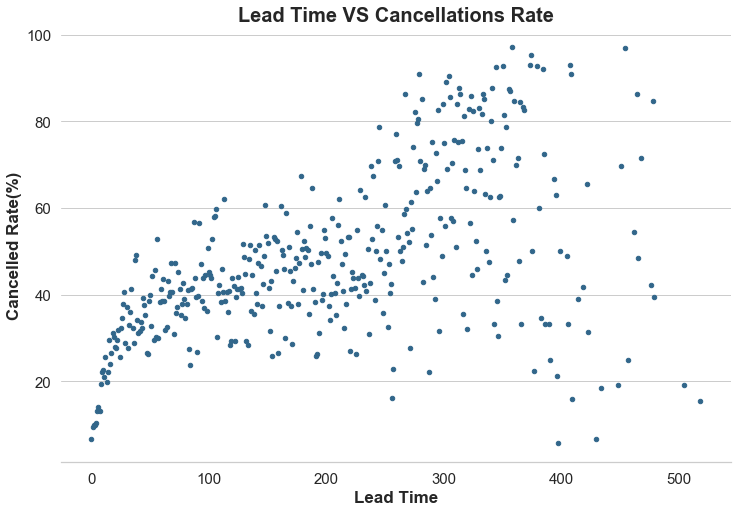

In [355]:
can_uncan_lead_time.plot(kind='scatter',x='lead_time',y='cancelled_rate(%)',figsize=(12,8),fontsize= 15,color='#31668a')
plt.title('Lead Time VS Cancellations Rate',weight='bold').set_fontsize('20')
    
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.xlabel('Lead Time',weight='bold',fontsize=17)
plt.ylabel('Cancelled Rate(%)',weight='bold',fontsize=17)
    
plt.grid(axis="x")
sns.despine(left=True)
plt.show()

- Lead time of cancellations is usually located below 100 days.

- As the lead time increases, the probability of cancellation increases. But it is hard to say there is a linear relationship.


### 17.The relationship of cancellation rate and planing stay time

In [356]:
#create a function to analysis a feature vs booking number
def ans_can_se(f):
    #group by the data about the feature
    clean_data_feature=clean_data_can.groupby([f,'is_canceled'])[f].count().sort_values(ascending=False).head(15)
    #plot the data of the feature
    clean_data_feature.unstack().plot(kind='bar',figsize=(12,8),fontsize= 15,color=['#c292a1'])
    plt.title(f+' VS Cancellations',weight='bold').set_fontsize('20')
    
    plt.xticks(rotation=0)
    plt.legend().set_visible(False)
    plt.xlabel(f,weight='bold',fontsize=17)
    plt.ylabel('No. of Cancellations',weight='bold',fontsize=17)
    
    plt.grid(axis="x")
    sns.despine(left=True)
    plt.show()

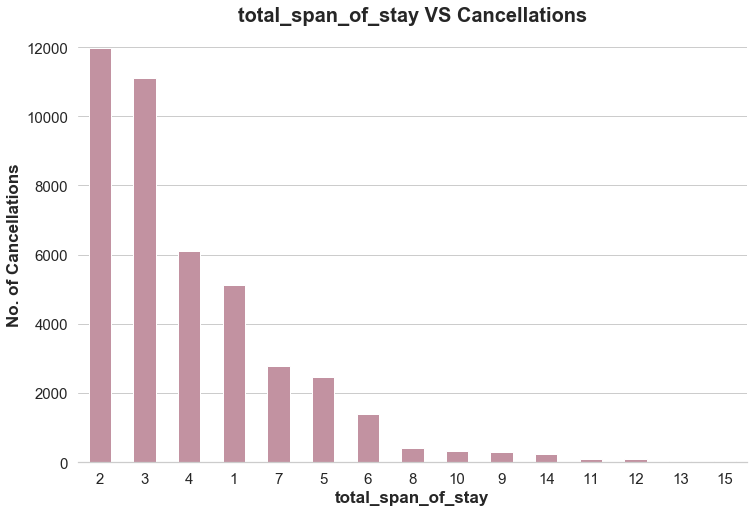

In [357]:
ans_can_se('total_span_of_stay')

    total_span_of_stay  cancelled_number  uncancelled_number  \
20                  20              13.0                 1.0   
30                  30              11.0                 2.0   
24                  24               5.0                 1.0   
18                  18              29.0                 6.0   
27                  27               4.0                 1.0   
29                  29              10.0                 3.0   
23                  23               6.0                 2.0   
19                  19              16.0                 6.0   
25                  25              23.0                14.0   
16                  16              21.0                18.0   
41                  56               1.0                 1.0   
21                  21              34.0                36.0   
15                  15              36.0                39.0   
2                    2           11975.0             15079.0   
12                  12              93.0

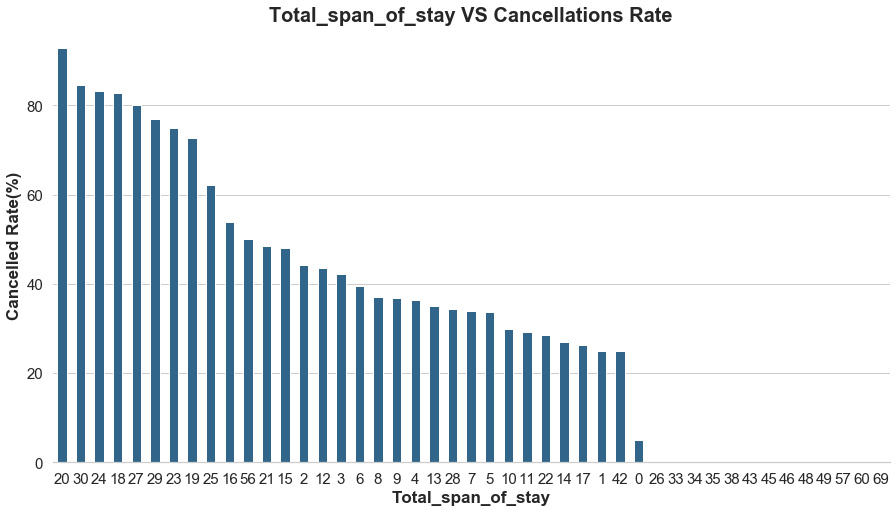

In [358]:
cancellation_rate('total_span_of_stay')

In [359]:
can_data_total_span_of_stay=clean_data_can.groupby('total_span_of_stay').is_canceled.count()
uncan_data_total_span_of_stay=clean_data_uncan.groupby('total_span_of_stay').is_canceled.count()
can_uncan_total_span_of_stay=pd.concat([can_data_total_span_of_stay,uncan_data_total_span_of_stay], axis=1)
can_uncan_total_span_of_stay.columns=['cancelled_number','uncancelled_number']
can_uncan_total_span_of_stay['cancelled_rate(%)']=(can_uncan_total_span_of_stay.cancelled_number/(can_uncan_total_span_of_stay.cancelled_number+can_uncan_total_span_of_stay.uncancelled_number))*100
can_uncan_total_span_of_stay['cancelled_rate(%)']=round(can_uncan_total_span_of_stay['cancelled_rate(%)'],2)
can_uncan_total_span_of_stay=can_uncan_total_span_of_stay.reset_index()
can_uncan_total_span_of_stay.head(5)


,total_span_of_stay,cancelled_number,uncancelled_number,cancelled_rate(%)
0,0,35.0,680.0,4.90
1,1,5133.0,15388.0,25.01
2,2,11975.0,15079.0,44.26
3,3,11114.0,15280.0,42.11
4,4,6114.0,10707.0,36.35


No handles with labels found to put in legend.


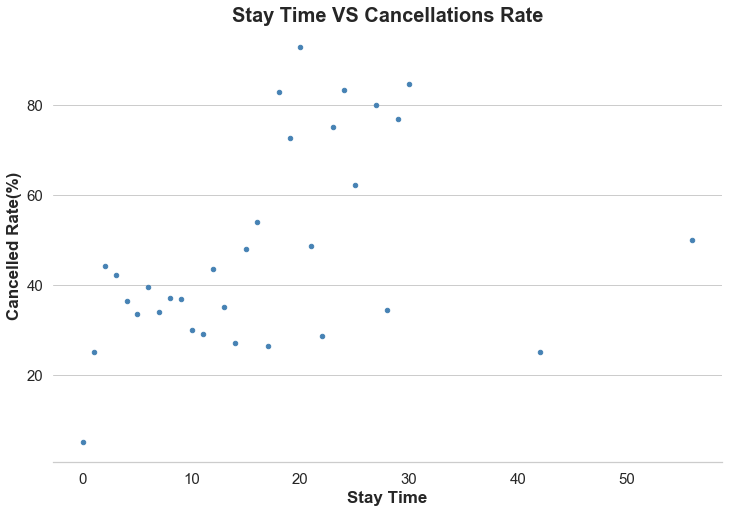

In [360]:
can_uncan_total_span_of_stay.plot(kind='scatter',x='total_span_of_stay',y='cancelled_rate(%)',figsize=(12,8),fontsize= 15,color='steelblue')
plt.title('Stay Time VS Cancellations Rate',weight='bold').set_fontsize('20')
    
plt.xticks(rotation=0)
plt.legend().set_visible(False)
plt.xlabel('Stay Time',weight='bold',fontsize=17)
plt.ylabel('Cancelled Rate(%)',weight='bold',fontsize=17)
    
plt.grid(axis="x")
sns.despine(left=True)
plt.show()

- 20-30 days stay time has the largest cancellation rate.
- But 2-4 days stay time has the largest cancellation number.

### 18.When are people more likely to cancel the booking? Weekends or week days?

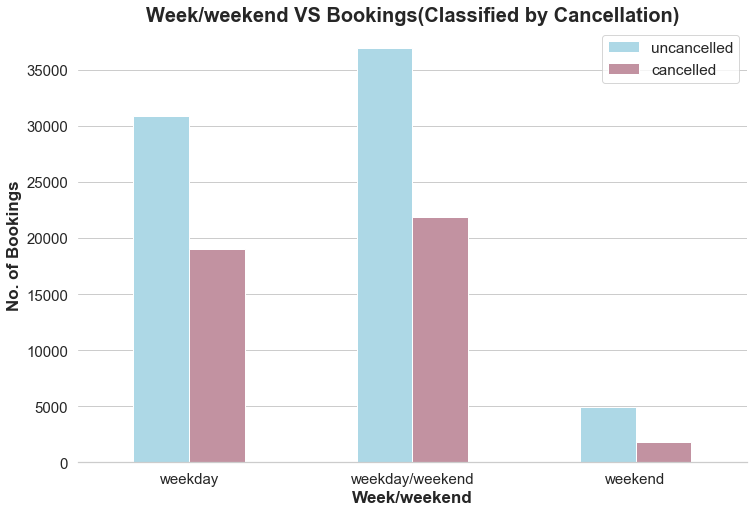

In [361]:
ans_can('week/weekend')

      week/weekend  cancelled_number  uncancelled_number  cancelled_rate(%)
0          weekday             19036               30928              38.10
1  weekday/weekend             21875               36964              37.18
2          weekend              1842                4950              27.12


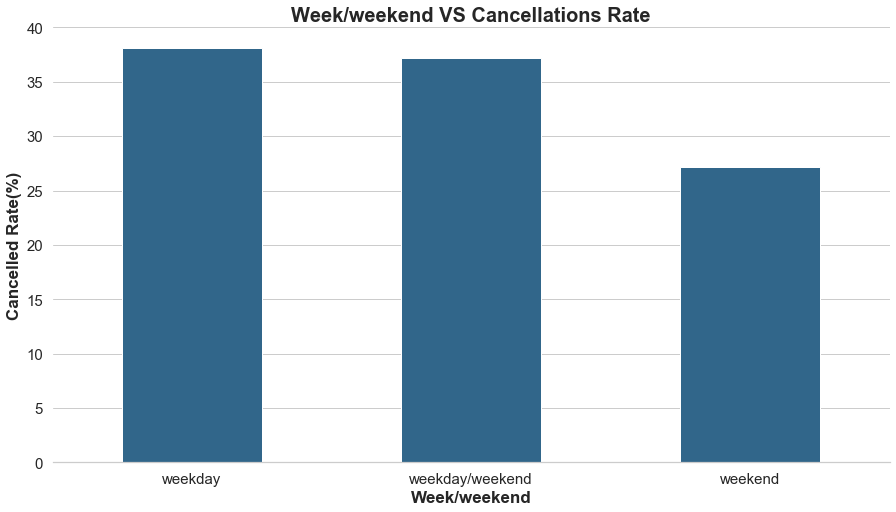

In [362]:
cancellation_rate('week/weekend')

<Figure size 720x720 with 0 Axes>

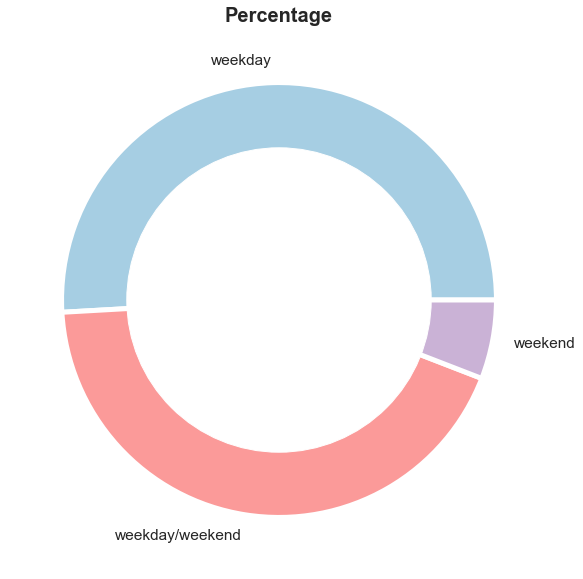

In [363]:
wk_labels=['weekday','weekday/weekend', 'weekend']
size = clean_data['week/weekend'].value_counts()

donut_ploy(size,wk_labels)

### 19. Will the number of special requests affect cancellation rate?

   total_of_special_requests  cancelled_number  uncancelled_number  \
0                          0             32657               36002   
2                          2              2732                9585   
1                          1              6901               25067   
3                          3               427                1890   
4                          4                34                 264   
5                          5                 2                  34   

   cancelled_rate(%)  
0              47.56  
2              22.18  
1              21.59  
3              18.43  
4              11.41  
5               5.56  


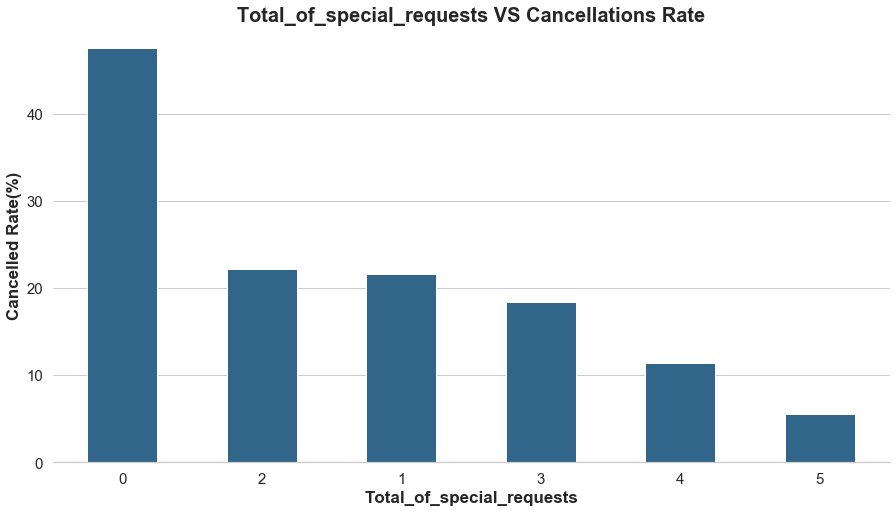

In [364]:
cancellation_rate('total_of_special_requests')

### 20. required car parking spaces


   required_car_parking_spaces  cancelled_number  uncancelled_number  \
0                            0           42753.0               65988   
1                            1               NaN                6825   
2                            2               NaN                  24   
3                            3               NaN                   3   
4                            8               NaN                   2   

   cancelled_rate(%)  
0              39.32  
1                NaN  
2                NaN  
3                NaN  
4                NaN  


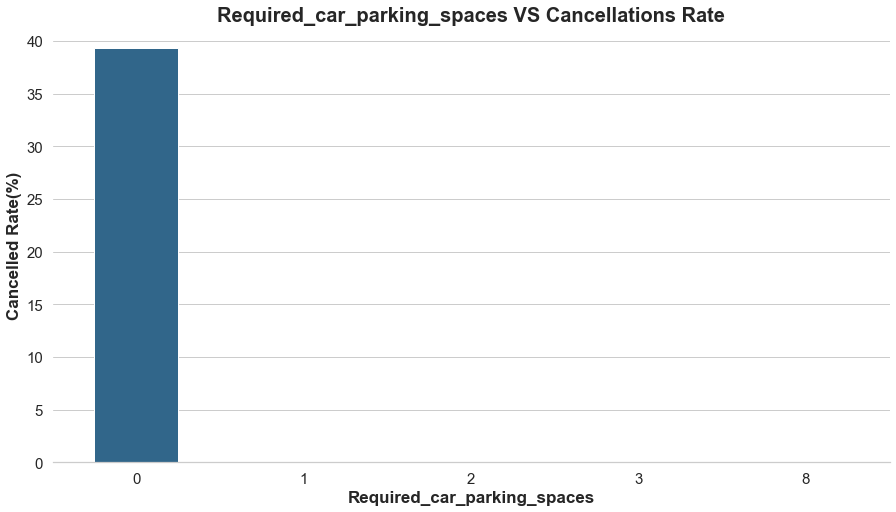

In [365]:
cancellation_rate('required_car_parking_spaces')

### 21.Will the booking change affect cancellation rate?

    booking_changes  cancelled_number  uncancelled_number  cancelled_rate(%)
16               16               1.0                   1              50.00
0                 0           40106.0               58306              40.75
6                 6              18.0                  40              31.03
8                 8               4.0                  12              25.00
10               10               1.0                   3              25.00
14               14               1.0                   4              20.00
2                 2             727.0                2914              19.97
5                 5              20.0                  91              18.02
4                 4              63.0                 291              17.80
3                 3             133.0                 737              15.29
1                 1            1675.0               10391              13.88
9                 9               1.0                   7              12.50

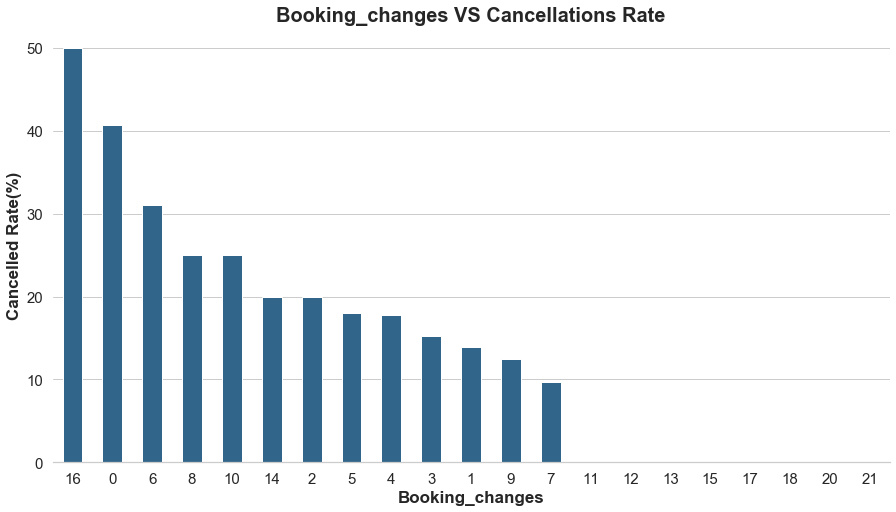

In [366]:
cancellation_rate('booking_changes')

### 22. Additional questions
### Deposit

  deposit_type  cancelled_number  uncancelled_number  cancelled_rate(%)
1   Non Refund             14461                  92              99.37
0   No Deposit             28258               72624              28.01
2   Refundable                34                 126              21.25


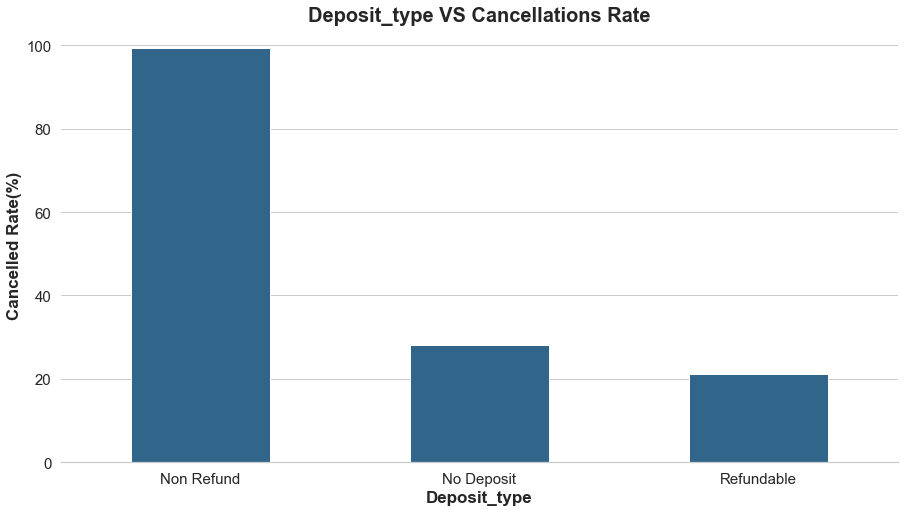

In [367]:
cancellation_rate('deposit_type')

<Figure size 720x720 with 0 Axes>

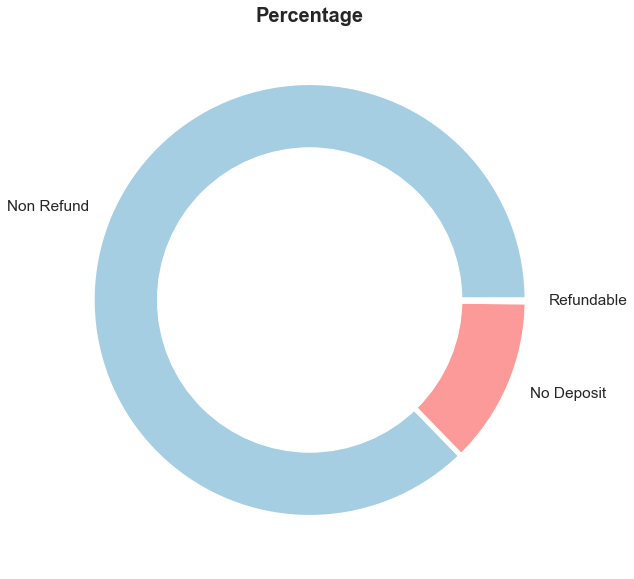

In [368]:
deposit_labels=['Non Refund','No Deposit', 'Refundable']
size = clean_data['deposit_type'].value_counts()

donut_ploy(size,deposit_labels)


#### create a Hypothesis Testing to research the deposit type and other features

In [369]:
import scipy.stats as sts

In [370]:
#HO:different deposit types have the same mean leadtime
#compute the P-value by leadtime
def leadtime_ht_deposit(m1,m2,alpha,ss):
    data1=np.random.choice(clean_data_can[clean_data_can['deposit_type']==m1]['lead_time'],ss)
    data2=np.random.choice(clean_data_can[clean_data_can['deposit_type']==m1]['lead_time'],ss)
    t, pval=sts.ttest_ind(data1,data2,equal_var=False)
    print('p-value is %.3f'%(pval))
    if pval>alpha:
        print('fail to reject H0')
    else:
        print('reject H0')

In [371]:
leadtime_ht_deposit('Non Refund','No Deposit',0.05,1000)

p-value is 0.969
fail to reject H0


### Kids

   number_of_kids  cancelled_number  uncancelled_number  cancelled_rate(%)
5            10.0               1.0                   1              50.00
2             2.0            1066.0                1590              40.14
0             0.0           40184.0               67786              37.22
3             3.0              19.0                  39              32.76
1             1.0            1483.0                3425              30.22
4             9.0               NaN                   1                NaN


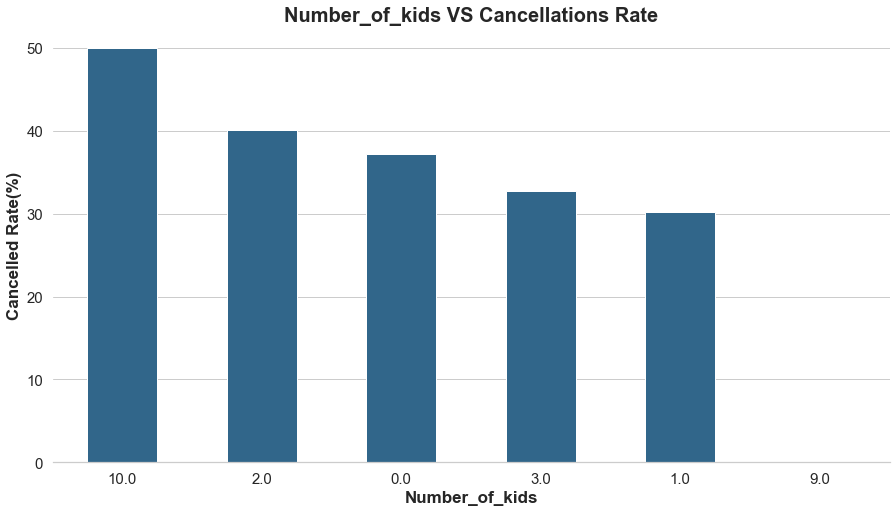

In [372]:
cancellation_rate('number_of_kids')

### repeated guest

   is_repeated_guest  cancelled_number  uncancelled_number  cancelled_rate(%)
0                  0             42204               69632              37.74
1                  1               549                3210              14.60


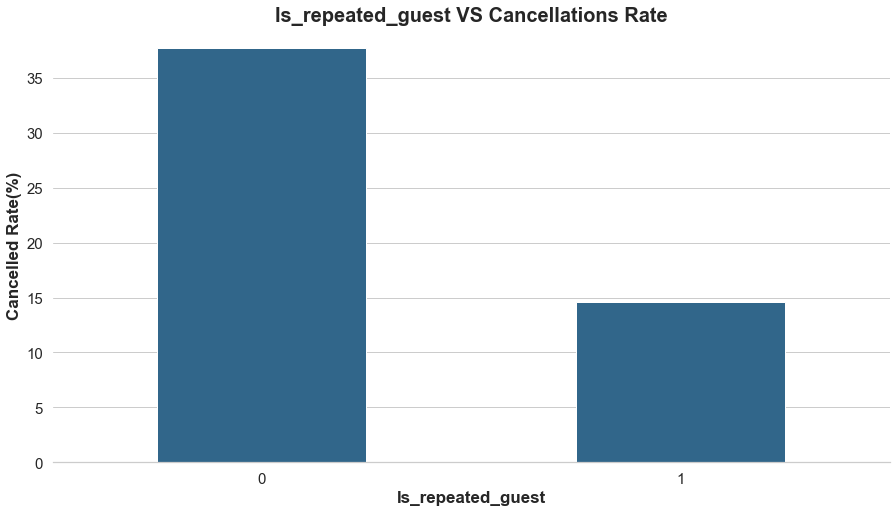

In [373]:
cancellation_rate('is_repeated_guest')

### days in waiting list

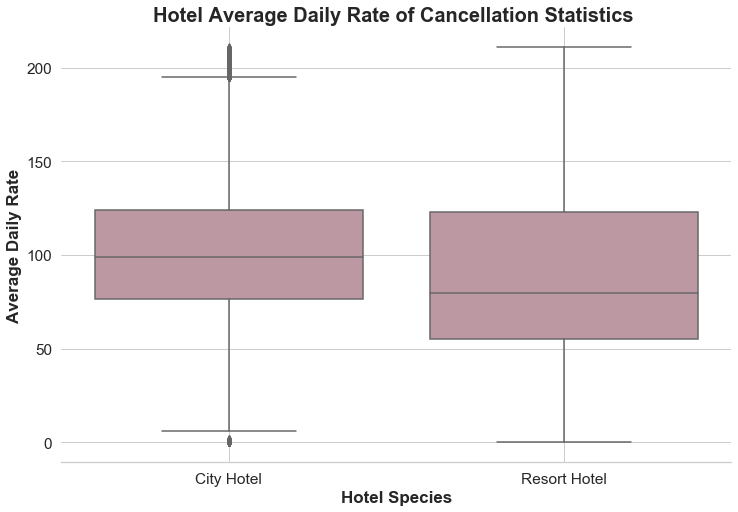

In [374]:

plt.figure(figsize=(12,8))
sns.set(style ='whitegrid',font_scale=1.4)

sns.boxplot(x='hotel',y='adr',data=clean_data_can,color='#c292a1',order = clean_data['hotel'].value_counts().index)

plt.title('Hotel Average Daily Rate of Cancellation Statistics ',weight='bold').set_fontsize('20')
plt.xlabel('Hotel Species',weight='bold',fontsize=17)
plt.ylabel('Average Daily Rate',weight='bold',fontsize=17)
plt.xticks(rotation= 0)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()

# 2. STATISTICAL ANALYSIS

## 3.1 Evaluate the most important numerical features
### 3.1.1 Evaluate the correlation

In [375]:
#calculate features correlation with target 
cancel_corr = clean_data.corr()["is_canceled"]
cancel_corr=cancel_corr.abs().sort_values(ascending=False)[1:]
cancel_corr

lead_time                         0.296587
total_of_special_requests         0.233214
required_car_parking_spaces       0.190400
booking_changes                   0.143636
previous_cancellations            0.111872
is_repeated_guest                 0.084991
adults                            0.062545
previous_bookings_not_canceled    0.057877
adr                               0.056329
days_in_waiting_list              0.055710
babies                            0.030956
stays_in_week_nights              0.021369
total_span_of_stay                0.013695
arrival_date_year                 0.013650
number_of_kids                    0.008493
stays_in_weekend_nights           0.005782
children                          0.000444
Name: is_canceled, dtype: float64

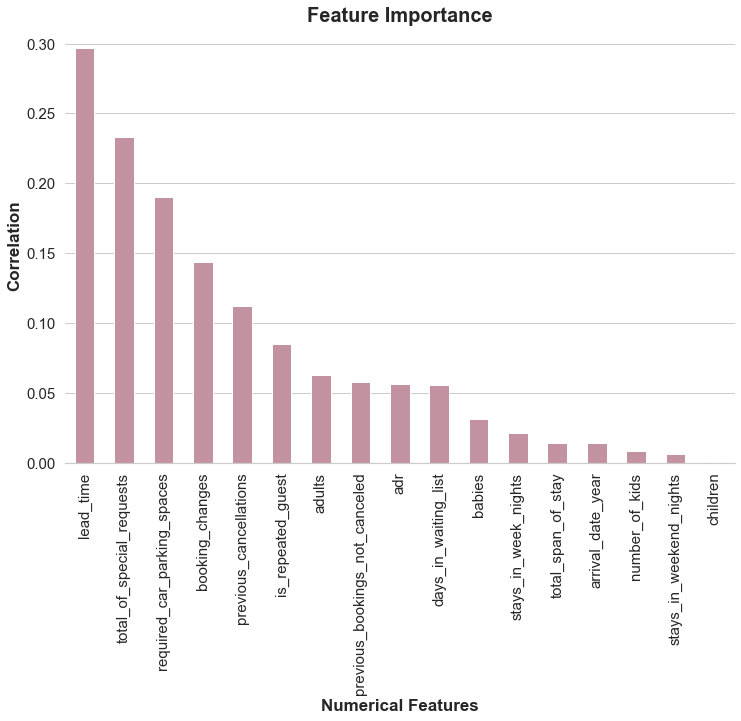

In [376]:
#plot the feature importance bar plot
cancel_corr.plot(kind='bar',figsize=(12,8),fontsize= 15,color=['#c292a1'])
plt.title('Feature Importance',weight='bold').set_fontsize('20')
plt.xlabel('Numerical Features',weight='bold',fontsize=17)
plt.ylabel('Correlation',weight='bold',fontsize=17)
plt.legend().set_visible(False)
plt.xticks(rotation= 90)

plt.grid(axis="x")
sns.despine(left=True)
plt.show()


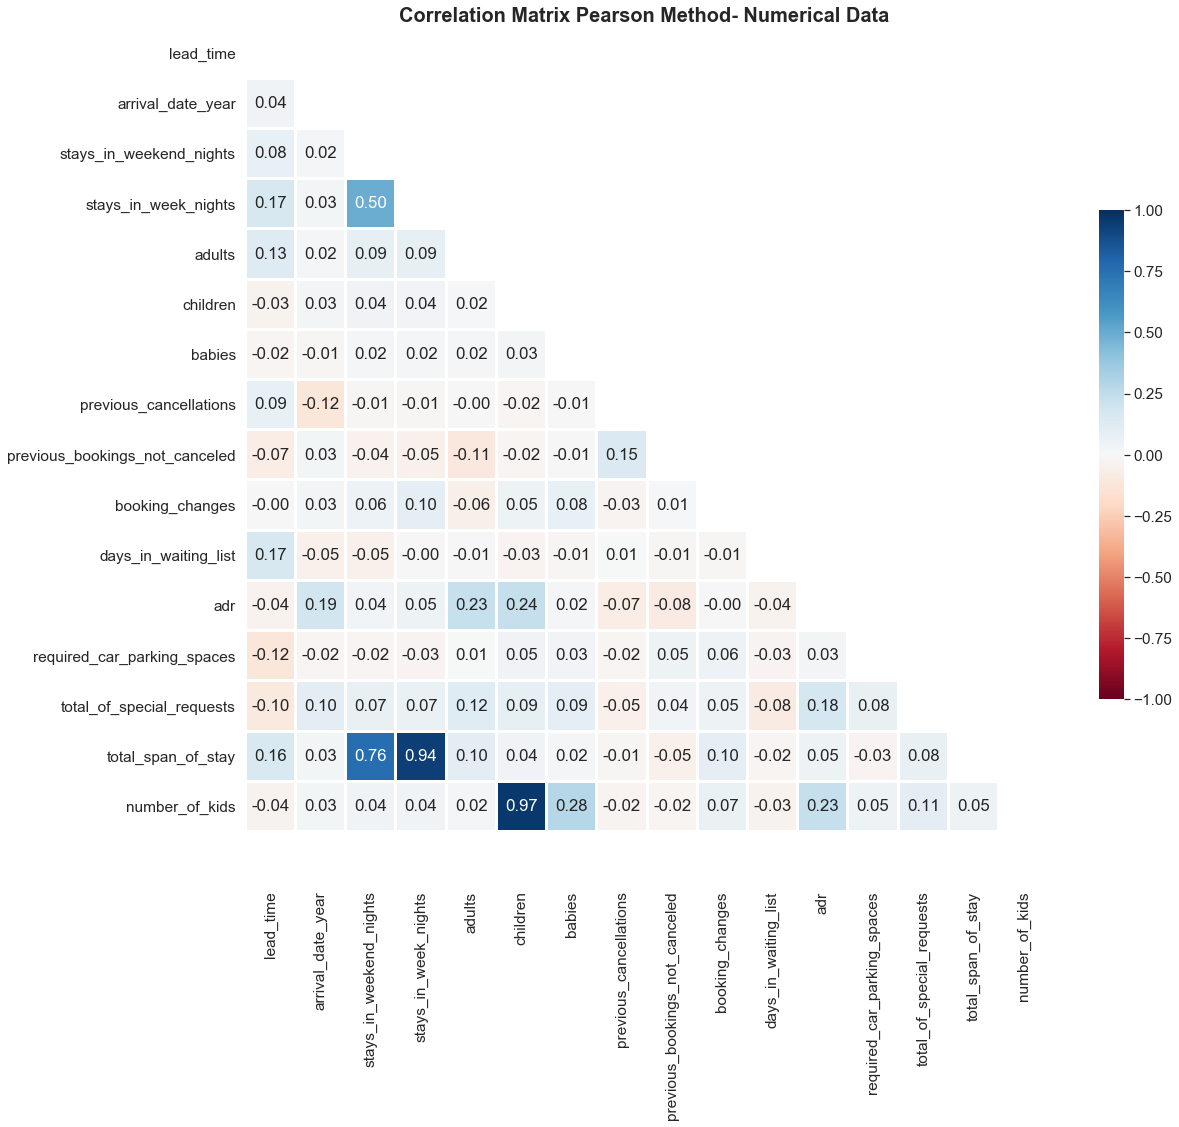

In [377]:
#plot the feature importance heatmap

hotel_data_numerical= clean_data.drop(['hotel','is_canceled', 'arrival_date_month','meal',
                                       'country','market_segment','distribution_channel', 
                                       'is_repeated_guest', 'reserved_room_type'
                                       ,'deposit_type', 
                                       'customer_type'], axis = 1)
plt.figure(figsize=(18,18))
corr_numerical=hotel_data_numerical.corr(method='pearson')
mask_numerical = np.triu(np.ones_like(corr_numerical, dtype=np.bool))
sns.heatmap(corr_numerical, annot=True, fmt=".2f", cmap='RdBu', mask= mask_numerical, vmin=-1, vmax=1, center= 0,
            square=True, linewidths=2, cbar_kws={"shrink": .5}).set(ylim=(17, 0))
plt.title('Correlation Matrix Pearson Method- Numerical Data ',weight='bold').set_fontsize('20')


- **lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes and previous_cancellations** are the 5 most important numerical features.  
- booking_change Will be affected by target variables, so I won't include it.
- According to EDA, I tend to put **adr** into the research fields.

## 3.2 Reseach the most important features
### 3.2.1 Linear correlation check

In [378]:
#cretae a function to compare the regplot and pearson value between research feature and cancellation rate
def fea_can_rate(f):
    #get the data
    feature_data=clean_data.groupby(f)["is_canceled"].describe()
    feature_data2=feature_data.reset_index()
    #plot the data
    plt.figure(figsize=(12, 8))
    sns.regplot(feature_data2[f], y=feature_data2["mean"].values * 100,color='#31668a')
    plt.title('Effect of '+ f+ "on Cancelation Rate",weight='bold').set_fontsize('20')
    plt.xlabel(f, weight='bold',fontsize=17)
    plt.ylabel("Cancelations [%]", weight='bold',fontsize=17)
    plt.show()
    
    corr_mat=np.corrcoef(feature_data2[f],feature_data2["mean"].values * 100)[0,1]
    print('Pearson Value between '+f+' and cancellation rate is '+str("%.2f" %(corr_mat)))
    

### adr

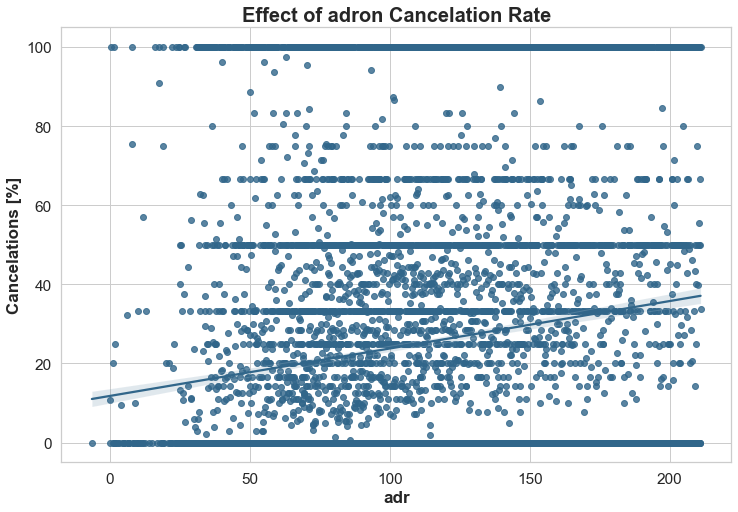

Pearson Value between adr and cancellation rate is 0.16


In [379]:
fea_can_rate('adr')

In [380]:
def hito_fea_(f):
    plt.figure(figsize=(12,8))
    sns.set(style ='whitegrid',font_scale=1.4)

    sns.distplot(clean_data[f],bins=10,color='#31668a')

    plt.title( f+'Distribution',weight='bold').set_fontsize('20')
    plt.xlabel(f,weight='bold',fontsize=17)

    plt.xticks(rotation= 0)

    plt.grid(axis="x")
    sns.despine(left=True)
    plt.show()

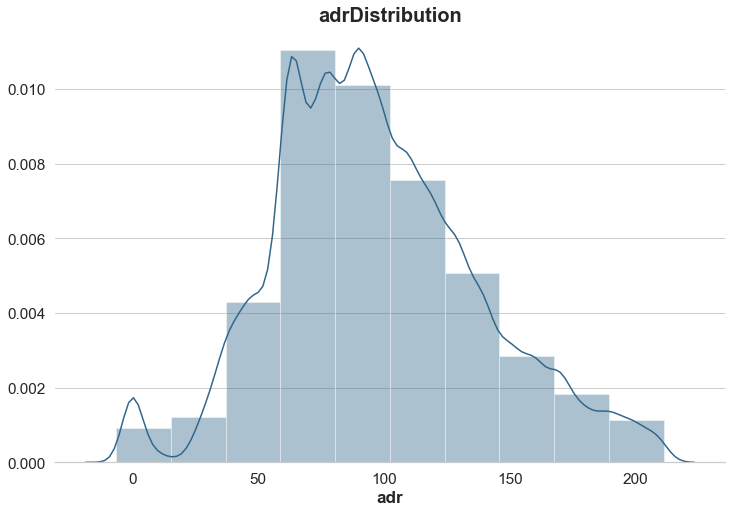

In [381]:
hito_fea_('adr')

### lead_time

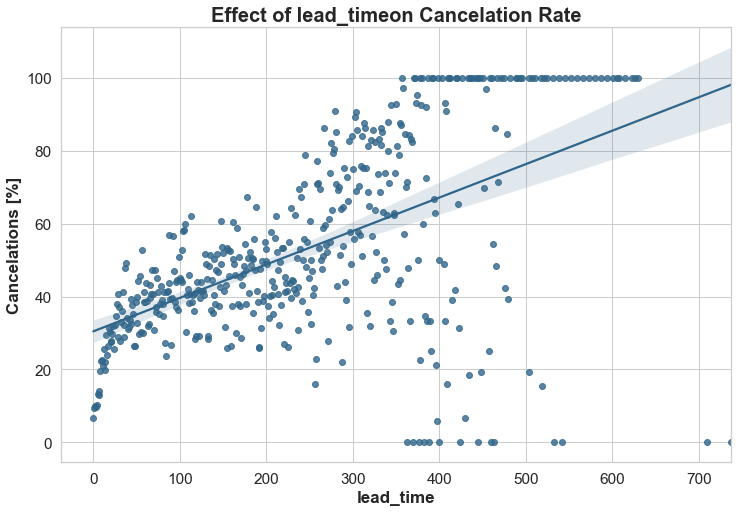

Pearson Value between lead_time and cancellation rate is 0.54


In [382]:
fea_can_rate('lead_time')

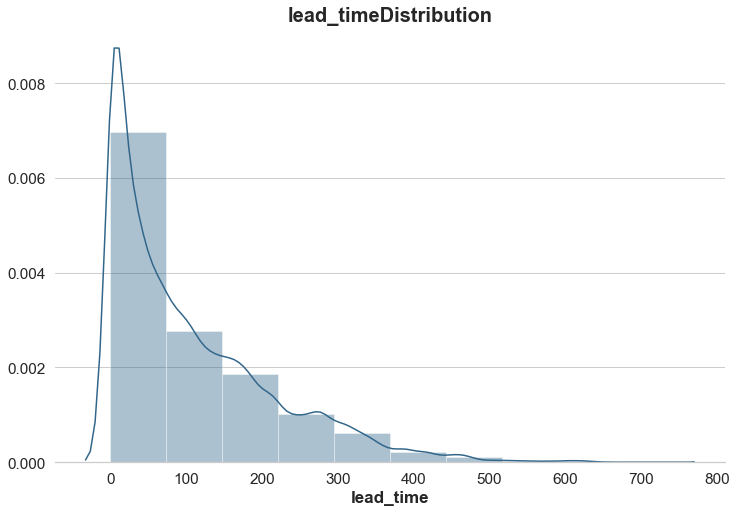

In [383]:
hito_fea_('lead_time')

### total of special requests

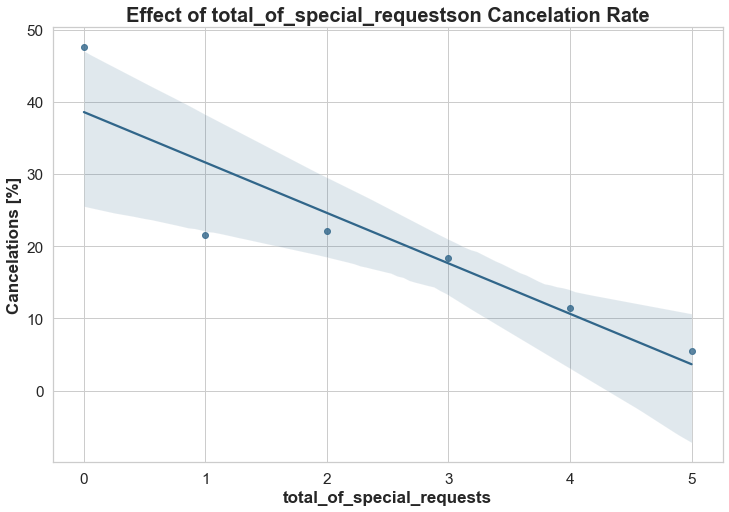

Pearson Value between total_of_special_requests and cancellation rate is -0.90


In [384]:
fea_can_rate('total_of_special_requests')

### total of required_car_parking_spaces

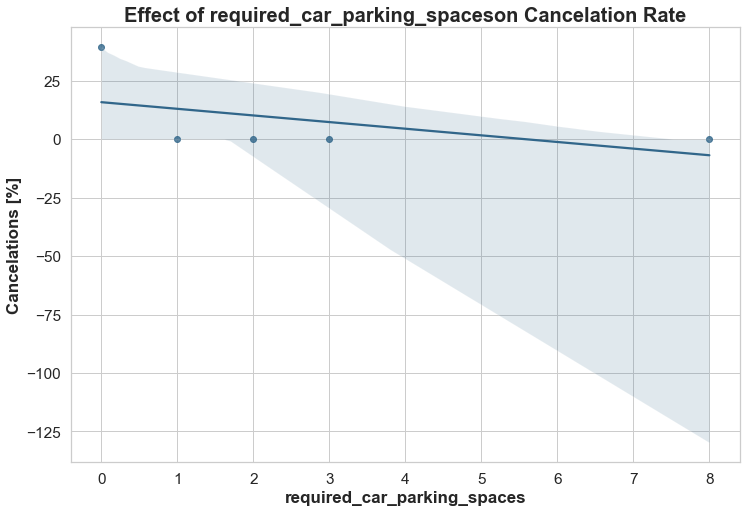

Pearson Value between required_car_parking_spaces and cancellation rate is -0.50


In [385]:
fea_can_rate('required_car_parking_spaces')

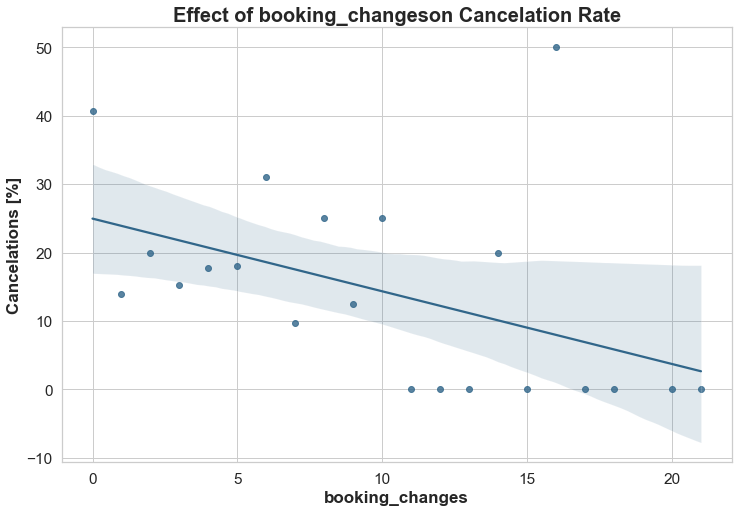

Pearson Value between booking_changes and cancellation rate is -0.46


In [386]:
fea_can_rate('booking_changes')

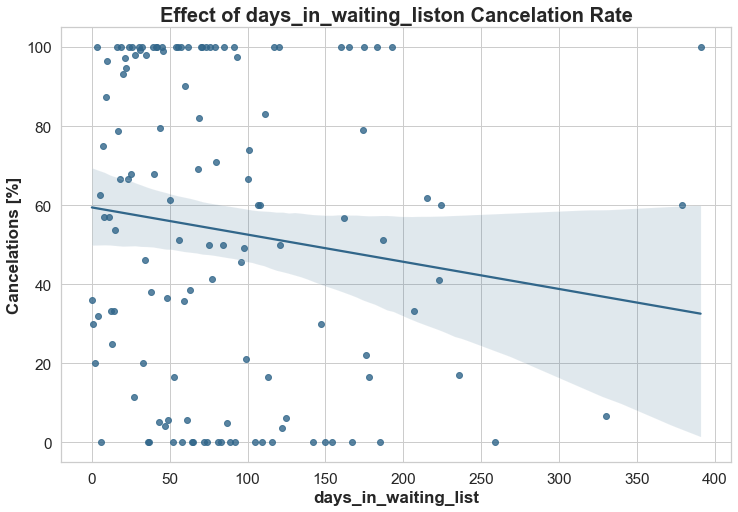

Pearson Value between days_in_waiting_list and cancellation rate is -0.13


In [387]:
fea_can_rate('days_in_waiting_list')

- To conclude,all the numerical features above don't have a linear regression correlation with cancelation rate.

# 4. Modeling

In [388]:
from sklearn.model_selection import train_test_split as split
import warnings
from sys import modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


## 4.1 Prepare for modeling

In [389]:
data_learn=clean_data[['is_canceled',"lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","number_of_kids","is_repeated_guest", "previous_cancellations","previous_bookings_not_canceled",
                "required_car_parking_spaces", "total_of_special_requests", "adr","hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]]

In [390]:
data_learn.head(3)

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,number_of_kids,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,required_car_parking_spaces,total_of_special_requests,adr,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type
0,0,342,0,0,2,0.0,0,0,0,0,0,0.0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
1,0,737,0,0,2,0.0,0,0,0,0,0,0.0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient
2,0,7,0,1,1,0.0,0,0,0,0,0,75.0,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient


In [391]:
data_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115595 entries, 0 to 115594
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     115595 non-null  int64  
 1   lead_time                       115595 non-null  int64  
 2   stays_in_weekend_nights         115595 non-null  int64  
 3   stays_in_week_nights            115595 non-null  int64  
 4   adults                          115595 non-null  int64  
 5   number_of_kids                  115595 non-null  float64
 6   is_repeated_guest               115595 non-null  int64  
 7   previous_cancellations          115595 non-null  int64  
 8   previous_bookings_not_canceled  115595 non-null  int64  
 9   required_car_parking_spaces     115595 non-null  int64  
 10  total_of_special_requests       115595 non-null  int64  
 11  adr                             115595 non-null  float64
 12  hotel           

### Variables Label Encoding

In [392]:
label_encoder = preprocessing.LabelEncoder()

In [393]:
for i in data_learn.columns:
    if data_learn[i].dtype=='object':
        data_learn[i]= label_encoder.fit_transform(data_learn[i])

C:\Users\FYsophia\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [394]:
data_learn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115595 entries, 0 to 115594
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     115595 non-null  int64  
 1   lead_time                       115595 non-null  int64  
 2   stays_in_weekend_nights         115595 non-null  int64  
 3   stays_in_week_nights            115595 non-null  int64  
 4   adults                          115595 non-null  int64  
 5   number_of_kids                  115595 non-null  float64
 6   is_repeated_guest               115595 non-null  int64  
 7   previous_cancellations          115595 non-null  int64  
 8   previous_bookings_not_canceled  115595 non-null  int64  
 9   required_car_parking_spaces     115595 non-null  int64  
 10  total_of_special_requests       115595 non-null  int64  
 11  adr                             115595 non-null  float64
 12  hotel           

### Classify the categorical variables and target

In [395]:
y= data_learn.is_canceled
X= data_learn.drop('is_canceled',axis=1)

## 4.1 Compare Models

In [396]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb



In [397]:
#choose the models
models= [("Dummy", DummyClassifier()),("Random Forest", RandomForestClassifier()),
               ("Logistic Regression", LogisticRegression()),("KNN", KNeighborsClassifier()),('GradientBoosting',GradientBoostingClassifier()),('Decision Tree',DecisionTreeClassifier()),('xgboost',xgb.XGBRegressor())]

### 4.1.1 auc

C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[16:51:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


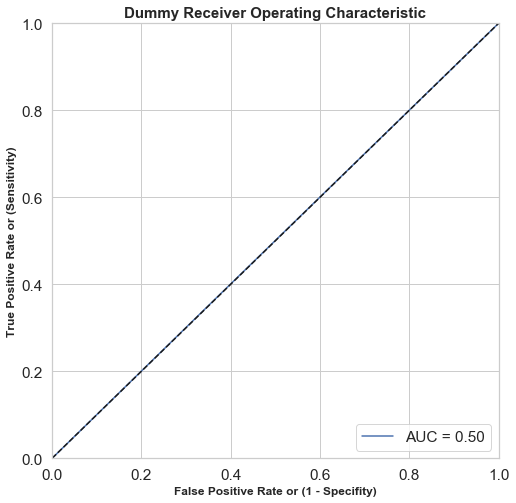

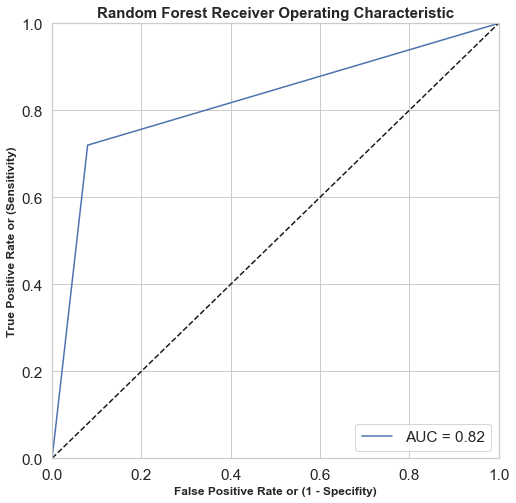

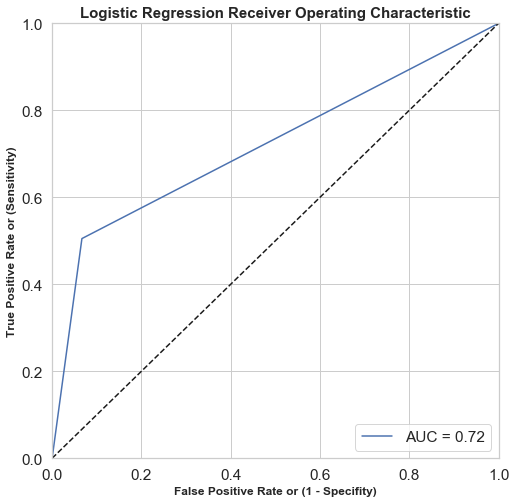

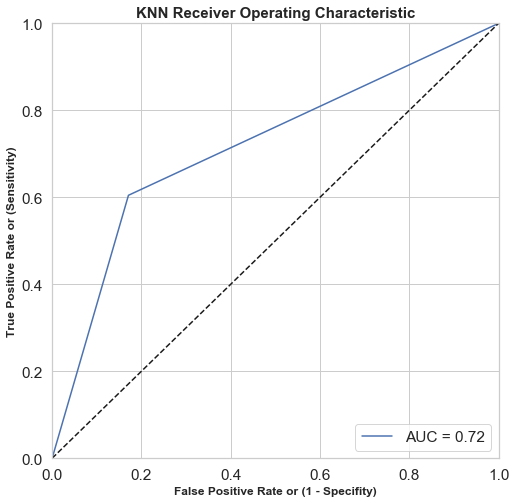

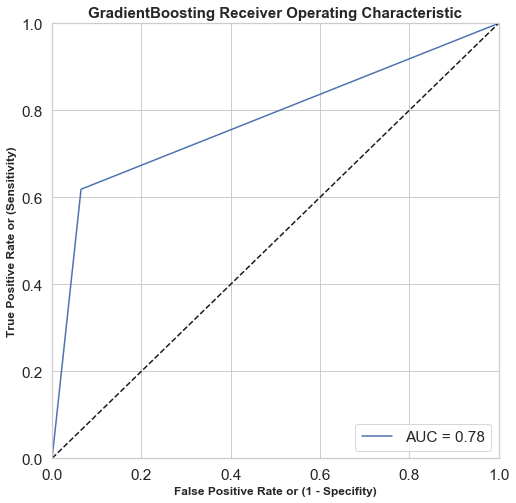

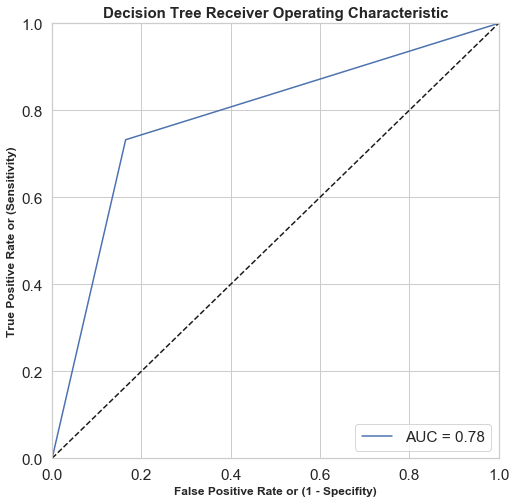

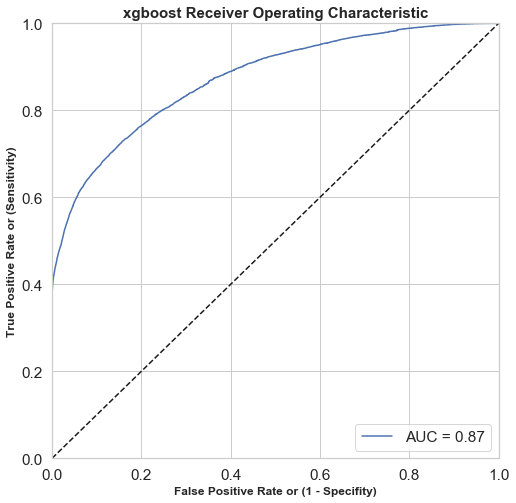

In [398]:
auc_score_list=[]
model_name_list=[]
fpr_list=[]
tpr_list=[]
tpr_list=[]
for name,model in models:
    #split data set
    X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=0.3, random_state=42)
    modeling=model
    modeling.fit(X_train, y_train)
    y_predict=modeling.predict(X_test)
    #compute auc
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
    auc=metrics.auc(fpr, tpr)
    auc_score_list.append(auc)
    model_name_list.append(name)
    
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr,label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)',weight='bold').set_fontsize('12')
    plt.ylabel('True Positive Rate or (Sensitivity)',weight='bold').set_fontsize('12')
    plt.title(name+' Receiver Operating Characteristic',weight='bold').set_fontsize('15')
        
   

In [399]:
auc_score_model=pd.DataFrame(data=dict(zip(model_name_list, auc_score_list)), index=[0]) 

In [400]:
auc_score_model

,Dummy,Random Forest,Logistic Regression,KNN,GradientBoosting,Decision Tree,xgboost
0,0.50042,0.820201,0.719212,0.716848,0.7769,0.783842,0.873781


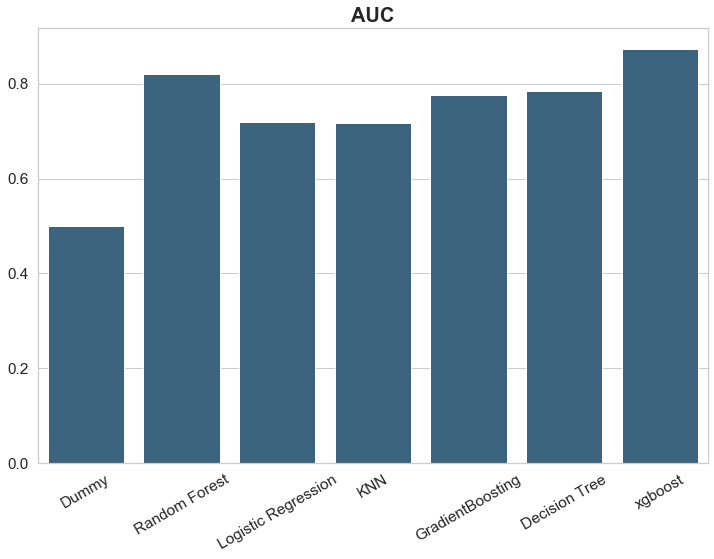

In [401]:
plt.figure(figsize=[12,8])

cmap =plt.get_cmap('Paired')
colors = cmap(np.arange(3)*4)
sns.set(style ='whitegrid',font_scale=1.4)
plt.xticks(rotation= 30)
sns.barplot(data=auc_score_model,color='#31668a')

plt.title( 'AUC',weight='bold').set_fontsize('20')

### check whether over fit in XGboost

In [402]:
X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=0.3, random_state=42)
xgb_model=xgb.XGBRegressor(colsample_bytree=0.3,learning_rate=0.1,
                max_depth=5, alpha=10)
xgb_model.fit(X_train, y_train)
y_predict=modeling.predict(X_test)

[16:51:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [403]:
data_matrix=xgb.DMatrix(data_learn)

In [404]:
params = {'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

In [405]:
xg_reg = xgb.train(params=params, dtrain=xgb.DMatrix(X_train,label=y_train), num_boost_round=10)

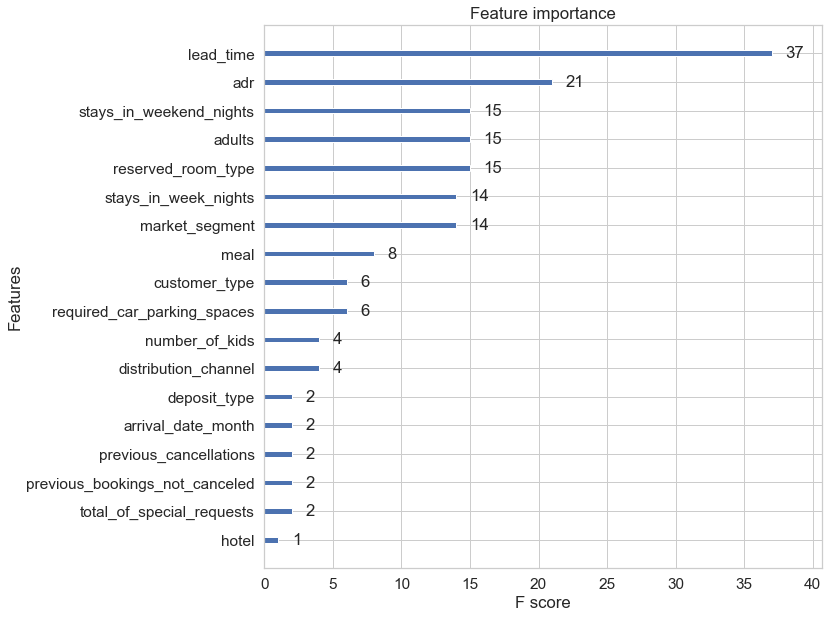

In [406]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

According to the feature importance, there is no obvious overfit in this model.

### 4.1.2 Accuracy score

In [407]:
#compute accuracy_score
accuracy_score_list=[]
model_name=[]
for name,model in models:
    X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=0.3, random_state=42)
    modeling=model
    modeling.fit(X_train, y_train)
    y_predict=modeling.predict(X_test)
    #calculate accuracy_score
    test_accuracy_score= accuracy_score(y_test, y_predict.round())
    #cross validation score
    accuracy_score_list.append(test_accuracy_score)
    model_name.append(name)


C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[16:51:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [408]:
accuracy_score_model=pd.DataFrame(data=dict(zip(model_name, accuracy_score_list)), index=[0]) 

In [409]:
accuracy_score_model

,Dummy,Random Forest,Logistic Regression,KNN,GradientBoosting,Decision Tree,xgboost
0,0.533497,0.845545,0.774436,0.745789,0.817739,0.796421,0.818048


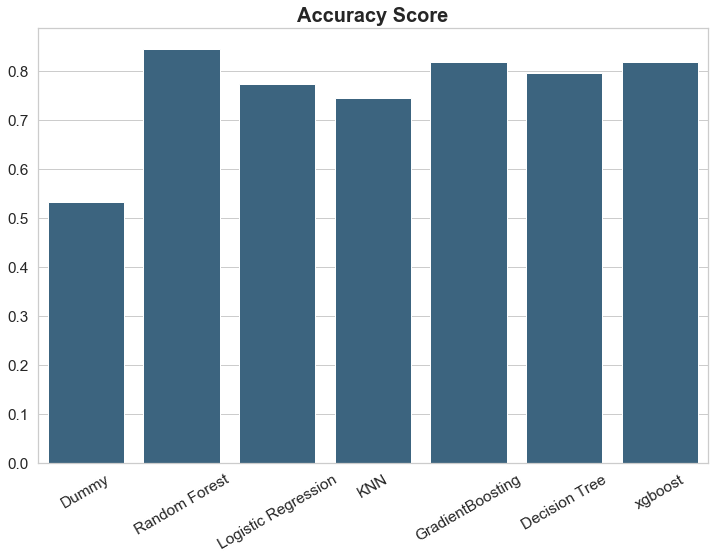

In [410]:
plt.figure(figsize=[12,8])

cmap =plt.get_cmap('Paired')
colors = cmap(np.arange(3)*4)
sns.set(style ='whitegrid',font_scale=1.4)
plt.xticks(rotation= 30)
sns.barplot(data=accuracy_score_model,color='#31668a')

plt.title( 'Accuracy Score',weight='bold').set_fontsize('20')

### 4.1.3 Cross Validation

In [411]:
model_name=[]
for name,model in models:
    model_name.append(name)
    
cross_validation_df = pd.DataFrame(columns=model_name)

for name,model in models:
    kfolds = 5
    split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
    cross_validation_df[name]=cross_val_score(model, X, y, cv=split)
    
    

C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\FYsophia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

[16:53:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:53:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [412]:
cross_validation_df

,Dummy,Random Forest,Logistic Regression,KNN,GradientBoosting,Decision Tree,xgboost
0,0.539340,0.866819,0.779445,0.774601,0.819240,0.823825,0.439092
1,0.539297,0.864960,0.776937,0.780094,0.822786,0.822440,0.445787
2,0.532376,0.863619,0.779965,0.773563,0.818894,0.821619,0.438999
3,0.534625,0.859726,0.768459,0.775682,0.814352,0.820278,0.433015
4,0.535620,0.860331,0.762706,0.773822,0.815260,0.819153,0.428555


In [413]:
cross_validation_df.describe()

,Dummy,Random Forest,Logistic Regression,KNN,GradientBoosting,Decision Tree,xgboost
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.536252,0.863091,0.773502,0.775553,0.818106,0.821463,0.437089
std,0.003036,0.003025,0.007597,0.002669,0.003391,0.001823,0.006572
min,0.532376,0.859726,0.762706,0.773563,0.814352,0.819153,0.428555
25%,0.534625,0.860331,0.768459,0.773822,0.815260,0.820278,0.433015
50%,0.535620,0.863619,0.776937,0.774601,0.818894,0.821619,0.438999
75%,0.539297,0.864960,0.779445,0.775682,0.819240,0.822440,0.439092
max,0.539340,0.866819,0.779965,0.780094,0.822786,0.823825,0.445787


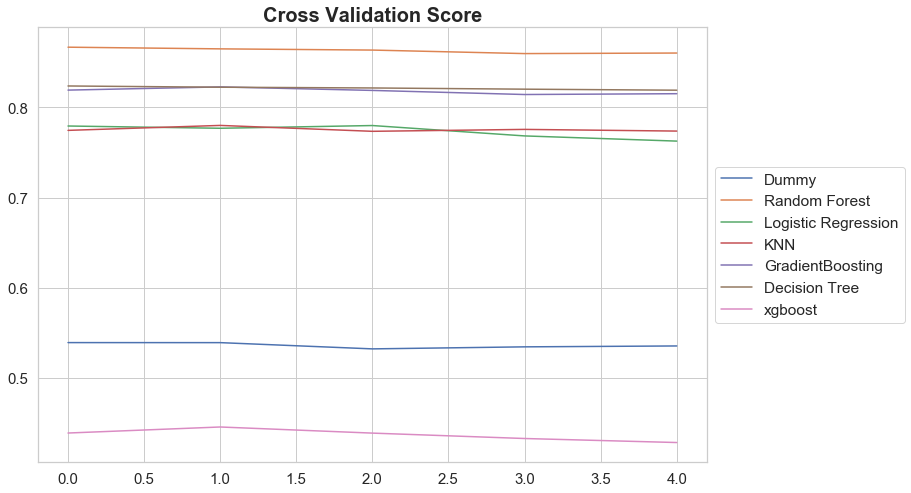

In [414]:
for i in range(len(cross_validation_df.columns)):
    
    cross_validation_df[cross_validation_df.columns[i]].plot(kind='line',figsize=(12,8),fontsize= 15)
    
    plt.title( 'Cross Validation Score',weight='bold').set_fontsize('20')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

- Random Forest performs best of all the models

## 4.2 Model Optimization

### 4.2.1 hyperparameter optimization

In [415]:
from sklearn.model_selection import GridSearchCV

In [416]:
X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=0.3, random_state=42)

In [417]:
# Create the parameter grid and model
parameters={'bootstrap': [True],'n_estimators':[10,20,50,100],'max_depth': [80, 90, 100, 110],'max_features': ['auto', 'sqrt']}
rf = RandomForestClassifier(random_state=14)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   39.6s finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'n_estimators': 100}

In [418]:
modeling=RandomForestClassifier(random_state=14,bootstrap=True,max_depth=80, n_estimators=100,max_features='auto')

In [419]:
modeling.fit(X_train, y_train)
y_predict=modeling.predict(X_test)

## 4.2.2 Compare the importance by RF

In [420]:
feat_labels = data_learn.columns[1:]
feat_labels 

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'number_of_kids', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'required_car_parking_spaces', 'total_of_special_requests', 'adr',
       'hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [432]:
importances = modeling.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    nm=("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    print(nm)

 1) lead_time                      0.201259
 2) adr                            0.150833
 3) deposit_type                   0.147614
 4) arrival_date_month             0.072284
 5) total_of_special_requests      0.060666
 6) stays_in_week_nights           0.060448
 7) market_segment                 0.055489
 8) previous_cancellations         0.053882
 9) stays_in_weekend_nights        0.037192
10) customer_type                  0.031932
11) reserved_room_type             0.025205
12) required_car_parking_spaces    0.021722
13) adults                         0.020920
14) meal                           0.018058
15) hotel                          0.013272
16) distribution_channel           0.012901
17) number_of_kids                 0.009293
18) previous_bookings_not_canceled 0.004957
19) is_repeated_guest              0.002074


In [422]:
#compute auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
auc=metrics.auc(fpr, tpr)
#compute accuracy_score
test_accuracy_score= accuracy_score(y_test, y_predict)
#compute corss validation
kfolds = 4
split = KFold(n_splits=kfolds, shuffle=True, random_state=42)
cross_validation_score=cross_val_score(modeling, X, y, cv=split)

In [423]:
print('auc '+ str(auc))
print('accuracy_score '+str(test_accuracy_score))
print('cross validation score '+str(np.mean(cross_validation_score)))

auc 0.8204752605400177
accuracy_score 0.8460397691461621
cross validation score 0.8605475874387708


- There is a little improvement of hyperparameter optimization

In [424]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)

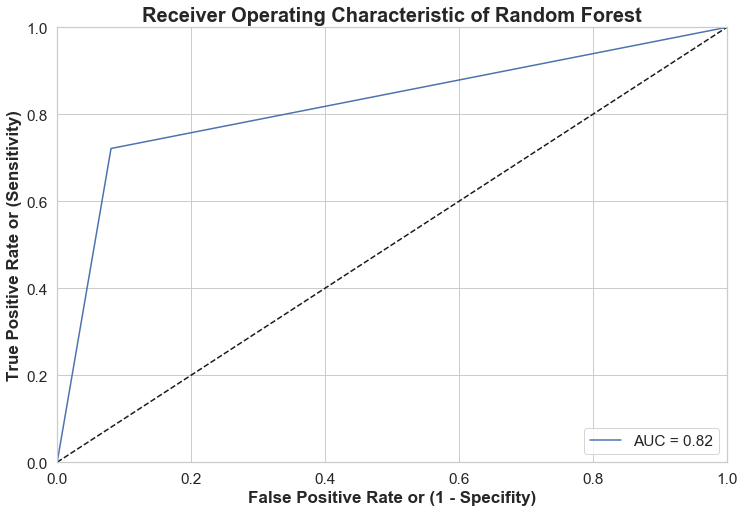

In [425]:
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr,label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)',weight='bold').set_fontsize('17')
plt.ylabel('True Positive Rate or (Sensitivity)',weight='bold').set_fontsize('17')
plt.title('Receiver Operating Characteristic of Random Forest',weight='bold').set_fontsize('20')